# Bootcamp 2021 - spotkanie 2
Regresja liniowa na przykładzie przewidywania cen nieruchomości

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Wczytujemy dane 
data = pd.read_csv (r'data/Real_estate_dataset.csv')
pd.DataFrame(data)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [66]:
#Usuwamy niepotrzebną kolumnę
data = data.drop("No", axis=1)

In [67]:
#podział na zmienne i wartość
X = data.drop(data.columns[6],axis=1)
y = data.iloc[:, 6]

#zmiana z pandas DataFrame na Numpy ndarray - żeby się nauczyć :)
X=X.values
print(X)

[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 ...
 [2013.25      18.8      390.9696     7.        24.97923  121.53986]
 [2013.         8.1      104.8101     5.        24.96674  121.54067]
 [2013.5        6.5       90.45606    9.        24.97433  121.5431 ]]


In [68]:
#normalizacja - dzielimy wszystko przez maksymalną warotść żeby nie operować na dużych liczbach
max_values = np.max(X,axis=0)
for i in range(0, X.shape[1]):    
    X[:,i]=X[:,i]/max_values[i]
    
print(X)

[[0.99966925 0.73059361 0.01308239 1.         0.99873634 0.99978588]
 [0.99966925 0.44520548 0.0472555  0.9        0.9986308  0.99977987]
 [1.         0.30365297 0.08661879 0.5        0.99891543 0.99981607]
 ...
 [0.99983462 0.42922374 0.06026022 0.7        0.99858642 0.99978275]
 [0.99971047 0.18493151 0.0161544  0.5        0.99808712 0.99978942]
 [0.99995878 0.14840183 0.01394201 0.9        0.99839054 0.9998094 ]]


In [69]:
#inicjujemy bete na 0 
beta = np.zeros(X.shape[1])
print(beta)

[0. 0. 0. 0. 0. 0.]


<h3>Funkcja straty</h3>
<center><h2>${J} = \frac{1}{n} \sum \limits _{i=1} ^{n} ({y}_{i} - pred_{i})^2$</h2></center>


In [70]:
#definiujemy pochodną funkcji straty
def cost_function(X, y, beta):
    y1 = beta*X
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(X.shape[0])

<h3>Pochodna cząstkowa funkcji straty</h3>
<center><h2>$\frac{\partial{X}_i}{\partial J} = \frac{-2}{n} \sum \limits _{i=1} ^{n} (pred_{i})^{'} ({y}_{i} - pred_{i})^2$</h2></center>

Gdzie $(pred_{i})^{'}$ to pochodna cząstkowa względem $X_{i}$ z wielomianu $(pred) = \beta _{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{n}X_{n}$ 

In [73]:
def gradient_descent(X, y, beta, alpha, i):
    
    # X - macierz X z danymi wejściowymi
    # y - wektor z danymi wyjściowymi
    # beta - wektor z przewidywanymi wartościami beta_0, beta_1 etc
    # alpha - learning rate
    # i - liczba iteracji którą będziemy wykonywać
    
    J = [] 
    for k in range(i):
        
        # liczymy przewidywaną wartość y, poprzez pomnożenie wektora beta przez macierz X
        y1 = beta*X
        y1 = np.sum(y1, axis=1)
        
        for c in range(0, X.shape[1]):
            
            # pochodna cząstkowa z X_c
            deriv = sum((y1-y)*X[:,c])/(2*len(X))
            
            # regresja liniowa - zmieniamy wektor beta
            beta[c] = beta[c] - alpha*deriv
            print(beta[c])
                                        
        # patrzymy jak nam poszło, czyli liczymy funkcje straty
        j = cost_function(X, y, beta)
                                        
        # dodajemy wynik do wektora J, żeby móc zobaczyć jak się zmienia funkcja straty
        J.append(j)
    return J, j, beta

In [74]:
J, j, beta = gradient_descent(X, y, beta, 0.05, 10000)

0.9493043220428604
0.36539095416142775
0.11415752887600342
0.4458212560386473
0.947867437722765
0.9492702104355966
1.8187854350231127
0.6978321560680782
0.21524304682908468
0.858051272256185
1.816039258535067
1.8187215152761063
2.615152275567315
1.0000964716855036
0.30436191687149594
1.2395021312872498
2.6112136642950627
2.6150624858897396
3.344549962487887
1.2747237302737793
0.38252659157503993
1.592749617970943
3.3395259412216607
3.3444379065351013
4.012607179753508
1.524040308685723
0.4506644212584399
1.9201530776262543
4.006595767046523
4.0124761547511705
4.624479577418619
1.7501770698105708
0.5096248059784865
2.223873605448236
4.617570542496903
4.624332599923244
5.1848895251607185
1.955085793479889
0.5601857464713593
2.5058907072767016
5.177165081222549
5.184729354655318
5.698162524950473
2.1405542265284434
0.6030598445560488
2.768017560202524
5.689697964201196
5.697991685457197
6.168260563619409
2.308219868055534
0.6388997992668037
3.011914990680475
6.15912483893818
6.16808136349

1.9582880324322105
-2.3060130405848596
9.216733110473177
11.26631602788437
11.277201531833677
11.276298008380756
1.9356621939368066
-2.3403829203691267
9.251735035596804
11.266547661838267
11.277377565471145
11.276460452659855
1.9130722373270825
-2.3746895304062203
9.286633683331909
11.266778977113942
11.277553349234628
11.276623130525168
1.890518291653252
-2.408932945367799
9.321429512341881
11.267010422828223
11.277729332763029
11.276786452200938
1.8680004697855495
-2.4431132460406104
9.356122964101274
11.267242408798671
11.27790592633559
11.276950791862374
1.845518869783249
-2.4772305187815538
9.390714464285885
11.26747530885087
11.278083504184298
11.27711649066985
1.8230735761486134
-2.511284855018614
9.42520442404614
11.267709463847757
11.278262407527903
11.277283859548069
1.8006646609754473
-2.545276350793818
9.459593241173613
11.267945184464361
11.278442947350948
11.277453181731689
1.7782921850011089
-2.579205106344678
9.493881301169644
11.268182753729334
11.278625406949244
11.2

-5.478033308605804
12.280786049199342
11.3073561973212
11.31297619675604
11.311268027211812
-0.1659775907290552
-5.506638729097556
12.306784132928335
11.307964097984481
11.313535273409565
11.311820475652873
-0.18505099504827574
-5.535193537464487
12.33270463976606
11.308575575216626
11.314097986033062
11.312376572866421
-0.20409227551987946
-5.563697851697514
12.35854777222518
11.309190614890447
11.314664320343763
11.312936304546247
-0.22310148643181488
-5.5921517894937915
12.384313732299201
11.309809202915975
11.315234262096517
11.313499656424254
-0.24207868198035123
-5.62055546825738
12.410002721463993
11.310431325240804
11.31580779708414
11.31406661427077
-0.2610239162700689
-5.648909005099917
12.435614940679269
11.311056967850407
11.316384911137721
11.314637163894817
-0.2799372433138642
-5.677212516841297
12.461150590390064
11.311686116768398
11.316965590126893
11.315211291144356
-0.2988187170329681
-5.705466120010353
12.486609870528186
11.312318758056783
11.317549819960076
11.3157

-1.7272139976182104
-7.838429423755729
14.31261115162026
11.37395539467824
11.375445950502087
11.373195848012724
-1.7436584776167612
-7.862960731040542
14.332442230382025
11.374830669822739
11.376277122681312
11.374021459620437
-1.7600752716665578
-7.887450854565663
14.35221187126741
11.375708413871711
11.377110810797003
11.374849598423323
-1.7764644264353255
-7.911899888824331
14.371920235550155
11.376588616007753
11.377947003908565
11.375680253465418
-1.7928259885106044
-7.936307928074611
14.391567484091949
11.377471265446815
11.378785691109083
11.37651341382447
-1.8091600043998903
-7.96067506633999
14.411153777343486
11.378356351438114
11.379626861525232
11.377349068611839
-1.8254665205307778
-7.985001397409965
14.430679275345504
11.379243863264039
11.380470504317175
11.378187206972399
-1.841745583251101
-8.009287014840643
14.450144137729833
11.380133790240055
11.38131660867848
11.379027818084456
-1.8579972388290742
-8.033532011955327
14.469548523720427
11.381026121714614
11.3821651

11.466733894672586
11.464228599580428
11.461498466132014
-3.1860461101802957
-10.018391948538403
15.957973637020327
11.467799749793869
11.465254312010014
11.46251962240882
-3.2000345434615642
-10.039368790180589
15.972586538492106
11.468867182937876
11.466281639127683
11.463542403282293
-3.213999424711177
-10.060312527247508
15.98715174668532
11.469936186071696
11.467310572804628
11.464566800610525
-3.227940793511187
-10.081223234165455
16.00166938773588
11.471006751187929
11.468341104937812
11.465592806277398
-3.2418586893759747
-10.10210098517631
16.016139587456994
11.472078870304621
11.469373227449893
11.46662041219251
-3.2557531517523723
-10.122945854337999
16.030562471339998
11.473152535465186
11.470406932289146
11.467649610291101
-3.2696242200197796
-10.14375791552496
16.044938164555177
11.474227738738335
11.471442211429398
11.468680392533981
-3.2834719334902824
-10.164537242428606
16.059266791952577
11.475304472218005
11.472479056869952
11.46971275090746
-3.297296331408772
-10.1

11.581948276266438
-4.5917453929064145
-12.142435219147515
17.304927412574493
11.593039778854648
11.586282650109588
11.583104494518969
-4.603366454410639
-12.16017949484979
17.314985087935302
11.594237003624821
11.58744326896509
11.584261581674792
-4.614967936724484
-12.177897841420052
17.325007176116422
11.595435055588156
11.588604742442127
11.58541953203058
-4.626549872655619
-12.195590315554645
17.334993772256343
11.596633929142575
11.589767064867125
11.586578339901838
-4.638112294955926
-12.213256973810296
17.34494497124971
11.59783361870457
11.590930230585265
11.587737999622846
-4.649655236321594
-12.230897872604466
17.354860867747934
11.59903411870915
11.592094233960438
11.588898505546611
-4.661178729393217
-12.248513068215699
17.36474155615982
11.600235423609789
11.593259069375184
11.590059852044808
-4.672682806755892
-12.266102616783972
17.374587130652174
11.60143752787837
11.594424731230644
11.591222033507727
-4.684167500939314
-12.283666574311047
17.384397685150425
11.6026404

-5.5328887733600425
-13.594897659599669
18.05637709798638
11.699738501558356
11.68989209275588
11.686437652020205
-5.542923475934969
-13.610584155604592
18.063670079471567
11.700988589235058
11.691107712306955
11.68765044715153
-5.552941254826317
-13.626249168198868
18.070934900971068
11.702239080835461
11.692323757647717
11.688863675763896
-5.562942138334632
-13.641892743160804
18.078171638570637
11.70348997218757
11.693540224549405
11.690077333619051
-5.572926154712523
-13.657514926156644
18.085380368160653
11.704741259133813
11.694757108797834
11.69129141649333
-5.5828933321647405
-13.673115762740844
18.092561165436617
11.705992937530995
11.695974406193345
11.692505920177613
-5.592843698848268
-13.688695298356363
18.099714105899654
11.707245003250259
11.697192112550772
11.69372084047728
-5.602777282872399
-13.704253578334935
18.106839264857
11.708497452177046
11.698410223699389
11.694936173212174
-5.612694112298819
-13.719790647897357
18.1139367174225
11.709750280211047
11.699628735

11.890931003040832
-6.994262510325943
-15.948426821471804
18.93635090237
11.911332188213926
11.895993743548605
11.892167442360828
-7.001829143310534
-15.961082837763502
18.93986118375898
11.912601689357892
11.897231744811013
11.893403782774099
-7.009382973404117
-15.973723657067183
18.943353646023066
11.913871068775785
11.898469638549406
11.894640021959288
-7.016924021949819
-15.986349309869656
18.946828338641705
11.915140324198854
11.899707422458645
11.895876157603944
-7.024452310254858
-15.998959826584189
18.9502853109667
11.916409453367118
11.900945094242463
11.897112187404495
-7.031967859590603
-16.011555237550684
18.95372461222253
11.917678454029343
11.902182651613431
11.898348109066225
-7.039470691192634
-16.024135573035863
18.957146291506692
11.91894732394301
11.903420092292937
11.899583920303241
-7.046960826260807
-16.036700863233452
18.96055039779001
11.920216060874298
11.904657414011156
11.900819618838451
-7.054438285959312
-16.049251138264363
18.96393697991696
11.92148466259

12.01860680826529
-7.716347120743565
-17.188487354111807
19.214433111591628
12.042333191972721
12.023788623335678
12.01982203289794
-7.72269030155854
-17.199713586564748
19.216333393727638
12.04357936389746
12.025004594058458
12.021036960333335
-7.729022717590205
-17.21092743036096
19.218220374538316
12.044825220612712
12.0262202604656
12.022251589045052
-7.7353443867586735
-17.222128909248614
19.220094091828273
12.046070760632325
12.027435621043404
12.023465917513146
-7.74165532695402
-17.233318046919262
19.221954583304225
12.047315982476531
12.028650674284616
12.024679944224129
-7.747955556036329
-17.244494867007976
19.223801886575238
12.048560884671907
12.029865418688413
12.025893667670944
-7.754245091835749
-17.25565939309349
19.225636039152977
12.049805465751366
12.031079852760373
12.02710708635295
-7.76052395215254
-17.26681164869835
19.22745707845196
12.05104972425413
12.03229397501246
12.028320198775905
-7.7667921547571295
-17.277951657289034
19.22926504178979
12.05229365872571

12.138435265729184
-8.300163175239799
-18.25341508229491
19.34436694204591
12.165173345567936
12.143658400879481
12.139614187176567
-8.305513919602738
-18.263511377796494
19.345109326756326
12.166381596770863
12.144837415067325
12.140792687798125
-8.310855550458543
-18.27359740080616
19.34584174397934
12.167589412693502
12.146016002448592
12.141970766624057
-8.316188082963578
-18.283673170058275
19.34656422286822
12.16879679239724
12.147194162063597
12.14314842268929
-8.32151153224888
-18.293738704243154
19.347276792500402
12.170003734948102
12.148371892957352
12.144325655033454
-8.326825913420208
-18.303794022007153
19.347979481877665
12.171210239416746
12.149549194179555
12.145502462700874
-8.332131241558079
-18.313839141952798
19.34867231992634
12.172416304878443
12.150726064784575
12.146678844740551
-8.33742753171781
-18.32387408263888
19.34935533549749
12.17362193041306
12.151902503831431
12.14785480020615
-8.342714798929569
-18.333898862580575
19.350028557367104
12.17482711510504

-8.814955775944107
-19.260749844045886
19.373015300685417
12.289507958733541
12.264965700087396
12.260893947752225
-8.819427807149706
-19.269862059192686
19.372856937897613
12.290666183660077
12.266095472599709
12.262023704833746
-8.823892185717565
-19.278965747784838
19.372691288646408
12.291823897498627
12.267224740567418
12.263152961856234
-8.8283489243666
-19.288060924483162
19.372518375091364
12.292981099724093
12.268353503449534
12.264281718274065
-8.832798035794537
-19.297147603914592
19.37233821933404
12.294137789814664
12.269481760708402
12.265409973544955
-8.837239532677957
-19.306225800672262
19.37215084341815
12.295293967251808
12.270609511809685
12.266537727129949
-8.841673427672315
-19.315295529315584
19.37195626932971
12.29644963152026
12.271736756222356
12.267664978493407
-8.846099733411991
-19.324356804370343
19.371754518997186
12.297604782108007
12.272863493418688
12.268791727102993
-8.850518462510315
-19.333409640328767
19.37154561429163
12.298759418506286
12.2739897

-20.148655525091105
19.322899907189584
12.404937227321188
12.377523971718691
12.373472982087822
-9.237534409463219
-20.156968073171168
19.32210311035234
12.406041136903157
12.378600021342718
12.374549451025464
-9.241281437505894
-20.165273429191195
19.321301012493706
12.40714449701476
12.379675526620787
12.375625379662143
-9.24502201773282
-20.173571604756205
19.32049363055968
12.40824730741474
12.380750487299567
12.376700767740514
-9.248756160858365
-20.181862611444927
19.3196809814516
12.409349567864153
12.381824903128079
12.377775615005586
-9.252483877579092
-20.190146460809874
19.31886308202623
12.410451278126367
12.382898773857685
12.378849921204713
-9.256205178573792
-20.198423164377406
19.318039949095887
12.411552437967044
12.383972099242074
12.379923686087587
-9.259920074503516
-20.206692733647795
19.31721159942856
12.412653047154144
12.385044879037263
12.380996909406226
-9.263628576011598
-20.214955180095284
19.316378049748014
12.413753105457904
12.386117113001584
12.382069590

-20.907761316372593
19.225744873183018
12.507328777841945
12.47729013460093
12.473296501810282
-9.566140624737649
-20.91543899546551
19.224514306783043
12.508379706390121
12.47831364034973
12.474320793951065
-9.569320578399696
-20.923110476142643
19.22327986467894
12.509430071830684
12.479336587102402
12.475344530782642
-9.57249502661615
-20.930775767781693
19.2220415600445
12.51047987410904
12.480358974795012
12.47636771223755
-9.575663978537227
-20.938434879739592
19.220799406018486
12.511529113172235
12.481380803365289
12.477390338249997
-9.578827443297973
-20.946087821352556
19.219553415704727
12.512577788968953
12.482402072752624
12.478412408755851
-9.581985430018287
-20.953734601936134
19.218303602172206
12.5136259014495
12.483422782898058
12.479433923692639
-9.585137947802947
-20.961375230785254
19.217049978455144
12.514673450565802
12.484442933744278
12.480454882999538
-9.588285005741637
-20.969009717174288
19.215792557553094
12.515720436271403
12.48546252523561
12.481475286617

12.568120430462855
-9.8448740759872
-21.617827643546477
19.091708480865247
12.605647433691967
12.572993695017628
12.569091879265493
-9.847569846746671
-21.6249502322944
19.09016119932088
12.606644269840158
12.573963463854117
12.570062772997959
-9.850260916982936
-21.632067435095387
19.088611159127176
12.60764054429488
12.574932674317518
12.571033111726013
-9.852947294512873
-21.639179259549703
19.0870583704736
12.608636257133362
12.575901326477851
12.572002895516569
-9.855628987140426
-21.646285713241223
19.085502843522246
12.609631408433966
12.576869420406284
12.57297212443769
-9.85830600265662
-21.65338680373747
19.083944588407896
12.61062599827617
12.577836956175128
12.573940798558588
-9.860978348839593
-21.66048253858965
19.082383615238097
12.611620026740573
12.578803933857829
12.574908917949614
-9.863646033454607
-21.667572925332706
19.08081993409322
12.612613493908887
12.579770353528966
12.575876482682256
-9.866309064254077
-21.674657971485342
19.079253555026547
12.61360639986393

12.660698037421065
-10.087861642075458
-22.29134132180058
18.928418493494096
12.700683168051924
12.665391584753298
12.661615561713228
-10.090132023373261
-22.297969857373666
18.926645372637424
12.701625481108694
12.666307124400829
12.662532542211425
-10.09239841187865
-22.30459367968481
18.924870371632476
12.702567244749297
12.66722211733081
12.663448979074547
-10.094660814238226
-22.311212794904563
18.923093498293756
12.70350845914166
12.668136563705636
12.664364872462249
-10.096919237087612
-22.317827209190572
18.921314760414482
12.704449124454454
12.669050463688452
12.665280222534944
-10.099173687051463
-22.32443692868763
18.919534165766645
12.705389240857086
12.669963817443158
12.6661950294538
-10.101424170743494
-22.33104195952769
18.91775172210107
12.706328808519695
12.670876625134403
12.667109293380735
-10.10367069476649
-22.337642307829906
18.91596743714746
12.707267827613151
12.671788886927578
12.668023014478416
-10.105913265712331
-22.34423797970067
18.91418131861446
12.70820

-23.254049259718645
18.639408855194816
12.838580943129697
12.799221469153075
12.795700208921843
-10.394193087209423
-23.26002151140416
18.637427598473312
12.839441513996016
12.800055623007292
12.796536245312856
-10.39592071970691
-23.265989860759596
18.635445438947592
12.840301567991578
12.80088926199381
12.797371769536925
-10.397645263880895
-23.27195431230574
18.633462381738028
12.84116110536407
12.80172238635664
12.798206781835798
-10.399366724885159
-23.27791487055449
18.631478431950654
12.842020126361518
12.802554996340145
12.79904128245157
-10.401085107864983
-23.283871540008857
18.6294935946772
12.842878631232274
12.803387092189025
12.799875271626682
-10.402800417957165
-23.289824325162996
18.62750787499513
12.843736620225023
12.80421867414832
12.800708749603915
-10.404512660290033
-23.295773230502228
18.62552127796767
12.844594093588778
12.805049742463407
12.801541716626392
-10.40622183998346
-23.301718260503055
18.623533808643867
12.845451051572876
12.805880297379998
12.802374

12.923740556704116
12.881696273958305
12.878380566233195
-10.555353583260448
-23.849454193788674
18.431442232746186
12.924549731828453
12.882479219032524
12.879165658100044
-10.55679135282842
-23.855046769050226
18.42939250414706
12.92535841674453
12.88326167557294
12.879950263916085
-10.558226518310532
-23.86063586442057
18.427342330963015
12.926166611724717
12.884043643849122
12.880734383948878
-10.559659084062533
-23.866221483607042
18.4252917170162
12.926974317041543
12.884825124130801
12.881518018466153
-10.561089054432994
-23.871803630310023
18.423240666117792
12.927781532967693
12.885606116687878
12.882301167735804
-10.562516433763323
-23.877382308222945
18.42118918206801
12.928588259776008
12.886386621790413
12.883083832025891
-10.563941226387776
-23.882957521032317
18.419137268656144
12.929394497739485
12.88716663970863
12.883866011604642
-10.56536343663347
-23.888529272417742
18.4170849296606
12.930200247131273
12.887946170712913
12.884647706740443
-10.566783068820397
-23.894

12.961151632233937
-10.697618668291815
-24.43930368451681
18.20614948128366
13.009870556805655
12.964950442435093
12.961885347286419
-10.698796787973782
-24.444537399198556
18.204071635051445
13.01062746848813
12.965681292942048
12.962618606166105
-10.699972738500852
-24.44976800037191
18.20199370180755
13.01138392059431
12.96641168527911
12.963351409151384
-10.701146523512607
-24.454995491074637
18.199915684330506
13.012139913406491
12.967141619726478
12.964083756520681
-10.702318146642636
-24.460219874339106
18.197837585390584
13.012895447206999
12.967871096564377
12.964815648552458
-10.703487611518547
-24.46544115319232
18.195759407749804
13.013650522278184
12.968600116073072
12.965547085525209
-10.704654921761978
-24.470659330655927
18.193681154161965
13.014405138902427
12.969328678532857
12.96627806771747
-10.705820080988605
-24.475874409746222
18.191602827372655
13.015159297362137
12.970056784224061
12.967008595407805
-10.706983092808153
-24.481086393474175
18.189524430119288
13.

-10.799350666586594
-24.918055159413253
18.010799979782842
13.079049327294797
13.031685343979742
13.028856350711864
-10.800340020539629
-24.92300879731847
18.00872505397598
13.079764273953305
13.032374353166388
13.029547974689809
-10.80132752254873
-24.927959585323787
18.006650268929437
13.080478787583042
13.033062930555039
13.03023916898722
-10.802313175731427
-24.932907526011796
18.004575626731828
13.081192868465374
13.03375107642541
13.03092993388222
-10.80329698320012
-24.937852621960765
18.00250112946529
13.081906516881624
13.03443879105718
13.03162026965289
-10.804278948062086
-24.94279487574463
18.00042677920552
13.082619733113068
13.03512607472998
13.032310176577276
-10.805259073419489
-24.947734289933035
17.99835257802178
13.083332517440937
13.035812927723404
13.032999654933379
-10.806237362369389
-24.952670867091303
17.996278527976926
13.084044870146412
13.036499350317
13.03368870499916
-10.807213818003751
-24.95760460978048
17.994204631127413
13.08475679151063
13.03718534279

13.09330166431747
13.090721900017899
-10.883827968144924
-25.366874599656786
17.818687058307663
13.143723217628919
13.0939521121127
13.091375150946922
-10.88465778637837
-25.371573711012417
17.81663336678792
13.144399088673913
13.094602153596378
13.092027997542115
-10.885486021709248
-25.37627019534307
17.81457998469493
13.145074552587136
13.095251789042006
13.09268044007553
-10.886312676812409
-25.380964054868052
17.812526913583376
13.145749609643303
13.095901018722987
13.093332478819129
-10.887137754358296
-25.38565529180316
17.810474155002865
13.146424260117033
13.096549842912635
13.093984114044783
-10.88796125701296
-25.390343908360702
17.80842171049797
13.147098504282848
13.097198261884172
13.094635346024274
-10.888783187438065
-25.39502990674949
17.806369581608227
13.147772342415175
13.097846275910726
13.095286175029294
-10.889603548290898
-25.399713289174855
17.804317769868153
13.148445774788346
13.098493885265333
13.095936601331438
-10.89042234222437
-25.40439405783866
17.80226

13.154089148007326
-10.959390219570228
-25.824127649964524
17.615082089439493
13.20933903843096
13.156990191136135
13.154703296094647
-10.960074303875889
-25.8285745071049
17.613066268149026
13.209975539226738
13.157600965753987
13.155317066544608
-10.960757052102831
-25.833018943002084
17.61105088874485
13.210611659829743
13.15821136115653
13.155930459618395
-10.961438466519754
-25.837460959560914
17.60903595233671
13.21124740050336
13.158821377606124
13.156543475577063
-10.962118549391619
-25.841900558683417
17.60702146003048
13.21188276151085
13.159431015365
13.157156114681548
-10.962797302979661
-25.84633774226882
17.60500741292816
13.212517743115342
13.160040274695266
13.157768377192658
-10.963474729541396
-25.850772512213556
17.60299381212789
13.213152345579834
13.160649155858902
13.158380263371074
-10.964150831330622
-25.855204870411278
17.600980658723977
13.213786569167196
13.16125765911776
13.158991773477352
-10.964825610597428
-25.859634818752845
17.59896795380687
13.21442041

13.215984888969311
-11.023775469435122
-26.273967132616324
17.40798858780825
13.27354615803568
13.218526846971159
13.216561137815656
-11.024332100061901
-26.278171898701267
17.40602400549577
13.274144504944502
13.21909956426669
13.217137035476181
-11.02488761162823
-26.28237442767021
17.404059961479717
13.274742498321526
13.219671928912843
13.217712582197892
-11.02544200604557
-26.28657472116651
17.402096456517388
13.275340138415592
13.22024394115765
13.218287778227648
-11.02599528522223
-26.290772780831286
17.400133491363142
13.275937425475393
13.220815601248995
13.218862623812162
-11.026547451063381
-26.294968608303414
17.39817106676842
13.276534359749473
13.221386909434619
13.219437119198004
-11.027098505471054
-26.299162205219545
17.396209183481737
13.277130941486227
13.22195786596211
13.220011264631593
-11.02764845034415
-26.3033535732141
17.394247842248703
13.2777271709339
13.222528471078915
13.220585060359204
-11.028197287578443
-26.30754271391928
17.392287043812026
13.278323048

13.276240246272227
-11.077799573346603
-26.715479815227393
17.199063709695697
13.336174910190312
13.27839254345694
13.2767799638816
-11.078245774009948
-26.719452034900822
17.19716108059127
13.33673648251551
13.278928577137513
13.27731935611722
-11.078691044873677
-26.723422182906415
17.195259056139573
13.337297727302932
13.279464284084787
13.277858423209759
-11.07913538753747
-26.727390260670816
17.19335763682306
13.337858644784792
13.279999664530337
13.278397165389737
-11.079578803598372
-26.731356269618882
17.19145682312198
13.33841923519315
13.280534718705583
13.278935582887517
-11.080021294650795
-26.73532021117368
17.189556615514423
13.33897949875991
13.281069446841789
13.279473675933305
-11.080462862286526
-26.7392820867565
17.187657014476287
13.339539435716812
13.28160384917006
13.280011444757154
-11.080903508094723
-26.743241897786856
17.185758020481316
13.340099046295446
13.282137925921345
13.28054888958896
-11.08134323366193
-26.747199645682485
17.18385963400109
13.340658330

-27.09134381465639
17.017387883115966
13.389156100075507
13.328900140241522
13.327620592038635
-11.117341967616873
-27.09512147351142
17.015545849288543
13.38968695911244
13.32940553586423
13.328129495687069
-11.117704265310072
-27.09889719126851
17.013704457571997
13.390217512399444
13.329910626484901
13.328638095825573
-11.118065778072348
-27.102670969196684
17.01186370826263
13.39074776015336
13.330415412319848
13.329146392669493
-11.118426507264473
-27.106442808563486
17.01002360165508
13.391277702590875
13.330919893585225
13.32965438643402
-11.118786454244978
-27.110212710635
17.008184138042324
13.391807339928514
13.331424070497034
13.33016207733419
-11.119145620370144
-27.11398067667584
17.006345317715667
13.392336672382644
13.331927943271113
13.330669465584878
-11.119504006994022
-27.11774670794916
17.004507140964765
13.392865700169473
13.332431512123147
13.331176551400805
-11.119861615468423
-27.12151080571665
17.002669608077625
13.393394423505054
13.332934777268663
13.33168333

13.374159282377505
-11.14814277006178
-27.441725533783043
16.845297653921484
13.438252046079567
13.37558033098245
13.374640576436947
-11.14843694205784
-27.445324259725076
16.843517726773666
13.438754805209726
13.376057695514211
13.37512158654729
-11.148730447694696
-27.448921158937583
16.8417384630422
13.439257278485762
13.376534774893544
13.375602312909269
-11.149023288137313
-27.452516232561855
16.839959862884097
13.439759466109587
13.377011569321915
13.376082755723457
-11.149315464548728
-27.45610948173796
16.838181926455082
13.44026136828296
13.377488079000635
13.376562915190283
-11.149606978090059
-27.45970090760475
16.836404653909607
13.440762985207478
13.377964304130861
13.377042791510014
-11.149897829920505
-27.463290511299846
16.834628045400862
13.44126431708459
13.378440244913596
13.377522384882768
-11.150188021197348
-27.46687829395966
16.832852101080768
13.441765364115588
13.378915901549687
13.37800169550851
-11.150477553075957
-27.470464256719385
16.831076821099987
13.442

13.418186223519099
-11.17303273535041
-27.772170509038038
16.680901643819173
13.484288530838546
13.419232733008153
13.418641683322669
-11.17326911287848
-27.77560235359497
16.679184603743227
13.48476528160927
13.41968415328556
13.41909687738148
-11.17350492554482
-27.779032473644566
16.677468236729048
13.485241764835065
13.420135306680852
13.419551805882064
-11.173740174346504
-27.782460870222405
16.675752542828512
13.485717980703518
13.420586193381231
13.42000646901081
-11.173974860278948
-27.78588754436303
16.674037522092526
13.486193929402068
13.421036813573757
13.420460866953954
-11.174208984335925
-27.78931249709996
16.672323174571037
13.486669611118007
13.421487167445335
13.42091499989759
-11.174442547509559
-27.79273572946568
16.67060950031302
13.487145026038473
13.421937255182725
13.421368868027658
-11.174675550790333
-27.796157242491656
16.66889649936649
13.48762017435046
13.422387076972537
13.421822471529953
-11.17490799516709
-27.799577037208334
16.6671841717785
13.488095056

-28.29682798409099
16.416357954879267
13.556850823871425
13.487775564925833
13.487800654985806
-11.204294767168832
-28.29999800701087
16.414748013147733
13.55728729531088
13.488186806788129
13.488215871283012
-11.204452410984167
-28.303166458256193
16.413138742240847
13.55772352721206
13.488597809720346
13.488630849852099
-11.204609630165256
-28.306333338719423
16.411530142087678
13.558159519739883
13.4890085738871
13.489045590856957
-11.204766425476548
-28.309498649292234
16.409922212616692
13.558595273059133
13.489419099452862
13.489460094461348
-11.204922797681219
-28.31266239086553
16.40831495375576
13.559030787334459
13.489829386581974
13.489874360828894
-11.20507874754118
-28.31582456432942
16.406708365432163
13.559466062730374
13.490239435438642
13.490288390123085
-11.205234275817071
-28.31898517057325
16.405102447572585
13.559901099411256
13.490649246186937
13.490702182507277
-11.20538938326827
-28.322144210485572
16.403497200103125
13.560335897541348
13.491058818990796
13.4911

13.525799079167145
13.526207009733561
-11.217476820031301
-28.594108335654017
16.26485049884404
13.597682907172667
13.526188339266813
13.526600355327114
-11.217597367349843
-28.597131439548868
16.26330455337429
13.59809711593854
13.526577375484536
13.526993478174978
-11.21771755725865
-28.600153054045414
16.26175926944713
13.598511100394557
13.526966187972516
13.527386378428693
-11.217837390410244
-28.603173179966323
16.26021464694216
13.598924860693076
13.527354776882834
13.527779056239673
-11.217956867456056
-28.60619181813359
16.25867068573855
13.599338396986328
13.527743142367445
13.52817151175921
-11.218075989046435
-28.609208969368535
16.257127385715034
13.599751709426416
13.528131284578176
13.528563745138463
-11.218194755830641
-28.612224634491813
16.255584746749904
13.60016479816532
13.528519203666729
13.528955756528473
-11.218313168456854
-28.6152388143234
16.254042768721025
13.600577663354892
13.52890689978468
13.529347546080153
-11.218431227572172
-28.618251509682615
16.2525

16.131325505542083
13.633291049133678
13.559583487863394
13.56035940260531
-11.226877432938437
-28.85742392192816
16.129837270184513
13.633686088239113
13.559953404438453
13.560733503251488
-11.226968606706098
-28.860317616922195
16.128349684251237
13.634080915969932
13.560323110195611
13.561107394158734
-11.227059477072006
-28.863209893211078
16.12686274758854
13.634475532467764
13.560692605276245
13.561481075467803
-11.227150044598474
-28.86610075156136
16.125376460042386
13.634869937874125
13.561061889821612
13.561854547319333
-11.227240309846877
-28.868990192738995
16.12389082145842
13.63526413233041
13.561430963972857
13.562227809853843
-11.22733027337765
-28.87187821750936
16.122405831681967
13.635658115977893
13.561799827870999
13.562600863211735
-11.227419935750287
-28.874764826637232
16.120921490558025
13.636051888957741
13.562168481656949
13.562973707533297
-11.22750929752335
-28.87765002088681
16.11943779793128
13.636445451410996
13.562536925471495
13.5633463429587
-11.22759

13.595690974944327
-11.23438839417657
-29.13161787480516
15.988540684679348
13.671021341416694
13.594854380239806
13.596045369370957
-11.234452622558052
-29.13437744032871
15.987115317196952
13.67139632145537
13.59520429112678
13.596399567181964
-11.234516597919852
-29.137135658875575
15.985690582706399
13.671771103455386
13.595554004507814
13.596753568507213
-11.23458032073982
-29.139892531158797
15.984266481027403
13.672145687547314
13.595903520513245
13.597107373476467
-11.234643791495007
-29.142648057890895
15.98284301197946
13.67252007386162
13.596252839273303
13.597460982219378
-11.23470701066166
-29.145402239783877
15.981420175381842
13.67289426252866
13.596601960918111
13.59781439486549
-11.234769978715228
-29.148155077549234
15.9799979710536
13.673268253678685
13.596950885577684
13.598167611544241
-11.23483269613036
-29.15090657189795
15.978576398813562
13.673642047441838
13.597299613381928
13.598520632384963
-11.234895163380905
-29.15365672354049
15.977155458480343
13.6740156

-29.408901336123456
15.84502014590663
13.70862661080468
13.629880284506237
13.631518085432946
-11.23979641714601
-29.411525820406354
15.84365899386569
13.708981860067285
13.630210518280522
13.631852708246294
-11.239836750497512
-29.414149028563646
15.842298455223649
13.709336924189197
13.630540567423452
13.63218714739107
-11.239876876455341
-29.416770961258653
15.840938529781535
13.709691803290347
13.63087043205474
13.632521402986452
-11.239916795420507
-29.419391619154254
15.839579217340237
13.710046497490573
13.631200112294003
13.63285547515152
-11.239956507793345
-29.42201100291287
15.838220517700496
13.710401006909608
13.631529608260756
13.633189364005252
-11.23999601397351
-29.424629113196477
15.836862430662912
13.710755331667091
13.63185892007442
13.633523069666534
-11.240035314359986
-29.427245950666595
15.835504956027947
13.711109471882562
13.632188047854314
13.633856592254151
-11.240074409351077
-29.429861515984296
15.834148093595921
13.711463427675461
13.632516991719662
13.63

-29.695059632015784
15.696337853076926
13.747290428800683
13.665745484726422
13.667880722666805
-11.243111929907199
-29.69754521386531
15.695044136249734
13.74762566590435
13.66605576205517
13.668195493614286
-11.243131380136512
-29.70002959119526
15.693751009789965
13.747960730707543
13.666365867569034
13.668510093651832
-11.243150663917268
-29.702512764621606
15.69245847348641
13.748295623319708
13.666675801377258
13.668824522888187
-11.243169781581118
-29.704994734759925
15.691166527127782
13.7486303438502
13.666985563588987
13.669138781432004
-11.243188733459151
-29.7074755022254
15.68987517050272
13.748964892408287
13.667295154313289
13.669452869391849
-11.243207519881892
-29.70995506763282
15.688584403399782
13.749299269103146
13.667604573659133
13.6697667868762
-11.243226141179306
-29.712433431596576
15.687294225607449
13.749633474043868
13.667913821735407
13.670080533993449
-11.243244597680796
-29.714910594730668
15.686004636914127
13.749967507339456
13.668222898650907
13.67039

13.696736455853426
-11.24425549115262
-29.925895753306367
15.576041288704662
13.778383502933945
13.694469520330605
13.697035624990473
-11.244260672037797
-29.92826960272442
15.57480270438663
13.778702848135215
13.69476395098611
13.697334633064216
-11.244265715304897
-29.93064230443285
15.57356469008537
13.779022031048155
13.695058219819838
13.697633480175444
-11.244270621236423
-29.933013859011925
15.57232724558424
13.779341051774141
13.69535232693297
13.697932166424872
-11.24427539011439
-29.93538426704155
15.571090370666571
13.779659910414464
13.695646272426599
13.69823069191313
-11.244280022220336
-29.93775352910127
15.56985406511565
13.779978607070335
13.695940056401744
13.698529056740771
-11.244284517835313
-29.94012164577028
15.568618328714729
13.780297141842885
13.69623367895934
13.698827261008264
-11.244288877239896
-29.94248861762742
15.567383161247026
13.780615514833162
13.696527140200239
13.699125304815999
-11.244293100714176
-29.94485444525117
15.56614856249572
13.780933726

15.458520560572023
13.808619043299512
13.722290493492443
13.725304540872319
-11.244150393411495
-30.153164923422256
15.457336254937376
13.808923106828923
13.722569686833928
13.72558839285798
-11.24414335973307
-30.155429002301123
15.45615249818325
13.809227017536646
13.722848727801713
13.725872093285453
-11.244136213940891
-30.15769198869393
15.454969290090975
13.809530775516537
13.723127616489462
13.726155642247969
-11.244128956273679
-30.15995388314763
15.453786630441874
13.809834380862375
13.72340635299077
13.726439039838686
-11.244121586969746
-30.162214686208852
15.452604519017264
13.810137833667866
13.723684937399154
13.726722286150686
-11.24411410626699
-30.164474398423906
15.451422955598456
13.810441134026645
13.723963369808063
13.72700538127698
-11.244106514402901
-30.166733020338775
15.450241939966757
13.81074428203227
13.724241650310866
13.727288325310502
-11.24409881161456
-30.168990552499125
15.44906147190347
13.811047277778224
13.724519779000863
13.727571118344118
-11.244

13.750527211471201
13.754030047511183
-11.24286005055326
-30.38287591438155
15.337124362816605
13.839728554777
13.750791046501266
13.754298623710884
-11.242842563726423
-30.385029246670175
15.335996495880536
13.840017070949392
13.751054738516132
13.754567057666966
-11.242824987527502
-30.38718154167764
15.33486915488205
13.8403054437642
13.751318287602151
13.754835349465376
-11.242807322155858
-30.389332799918833
15.33374233960326
13.840593673307891
13.751581693845617
13.755103499191993
-11.242789567810505
-30.391483021908343
15.332616049826303
13.840881759666871
13.75184495733275
13.755371506932635
-11.24277172469011
-30.393632208160465
15.331490285333329
13.841169702927473
13.752108078149707
13.755639372773048
-11.242753792992996
-30.395780359189207
15.330365045906515
13.841457503175967
13.752371056382577
13.755907096798916
-11.242735772917142
-30.397927475508276
15.329240331328052
13.841745160498554
13.752633892117384
13.756174679095855
-11.242717664660178
-30.400073557631092
15.328

13.77646644635758
13.780451969988228
-11.240674403870646
-30.595208831791066
15.225829571841482
13.868158874744756
13.776716262079749
13.780706602789389
-11.2406488417106
-30.59725995092089
15.22475372833038
13.86843333759621
13.776965943181917
13.780961101702148
-11.24062320865432
-30.599310083331012
15.223678388880947
13.868707665496622
13.777215489744009
13.781215466806051
-11.240597504868878
-30.60135922950789
15.222603553278207
13.86898185852603
13.777464901845892
13.781469698180578
-11.240571730521054
-30.603407389937715
15.221529221307222
13.869255916764413
13.77771417956737
13.781723795905153
-11.240545885777335
-30.60545456510641
15.220455392753093
13.869529840291685
13.777963322988187
13.781977760059135
-11.240519970803915
-30.60750075549963
15.219382067400959
13.869803629187706
13.778212332188028
13.782231590721828
-11.240493985766694
-30.609545961602755
15.218309245035995
13.870077283532268
13.778461207246517
13.782485287972474
-11.240467930831283
-30.6115901839009
15.21723

13.806230887877398
-11.237665337175205
-30.803327717833547
15.116602637454411
13.895994515463332
13.801976770871097
13.806472011589014
-11.237633245346393
-30.805278775516285
15.115578072374422
13.896255361320266
13.802212876806362
13.806713009371796
-11.237601098509266
-30.80722889566688
15.114553989223069
13.896516080235974
13.802448856193754
13.806953881299314
-11.237568896802824
-30.809178078744903
15.113530387789961
13.896776672284496
13.802684709107147
13.807194627445082
-11.237536640365814
-30.811126325209667
15.112507267864755
13.897037137539815
13.80292043562036
13.807435247882557
-11.23750432933674
-30.813073635520244
15.11148462923716
13.897297476075863
13.803156035807156
13.807675742685143
-11.23747196385386
-30.81502001013546
15.110462471696932
13.897557687966513
13.803391509741243
13.807916111926192
-11.237439544055185
-30.816965449513884
15.109440795033883
13.897817773285587
13.803626857496274
13.808156355678998
-11.237407070078481
-30.81890995411385
15.108419599037873
1

13.922703853615312
13.826090534091925
13.83110313406808
-11.233983109684827
-31.005009911884674
15.010640342237643
13.92295176486487
13.82631374582576
13.831331308450316
-11.233945914768382
-31.00686410170826
15.009665700923131
13.923199556657533
13.826536838478928
13.831559364407903
-11.233908678277277
-31.008717401368635
15.00869151953324
13.923447229061862
13.826759812119828
13.8317873020089
-11.233871400326457
-31.010569811300083
15.007717797863409
13.923694782146365
13.826982666816809
13.832015121321318
-11.23383408103066
-31.012421331936654
15.006744535709132
13.923942215979501
13.827205402638171
13.83224282241312
-11.233796720504413
-31.014271963712165
15.005771732865965
13.92418953062968
13.827428019652166
13.83247040535222
-11.233759318862043
-31.01612170706021
15.004799389129522
13.924436726165265
13.82765051792699
13.832697870206482
-11.233721876217666
-31.017970562414156
15.003827504295478
13.924683802654563
13.8278728975308
13.832925217043721
-11.233684392685193
-31.019818

13.84767252932281
-11.231125610697633
-31.13984351850871
14.939745949999438
13.940970274383952
13.842505524473827
13.847892120967726
-11.231085636665215
-31.141632994565157
14.938804794497608
13.941209413323355
13.842719991674228
13.848111599094187
-11.231045629025564
-31.143421611986135
14.93786408394692
13.941448437813214
13.842934344789466
13.848330963766724
-11.231005587879173
-31.14520937118938
14.936923818147362
13.941687347918496
13.84314858388435
13.848550215049825
-11.23096551332635
-31.146996272592418
14.935983996898987
13.94192614370412
13.843362709023642
13.848769353007928
-11.23092540546722
-31.148782316612554
14.935044620001914
13.942164825234956
13.84357672027206
13.848988377705428
-11.230885264401726
-31.150567503666878
14.934105687256324
13.942403392575832
13.843790617694273
13.849207289206674
-11.230845090229629
-31.152351834172258
14.933167198462462
13.94264184579153
13.844004401354908
13.849426087575969
-11.230804883050507
-31.15413530854535
14.932229153420636
13.94

13.864886372791503
-11.227829462838407
-31.280322295739015
14.86584322444035
13.959744994426211
13.859307644114667
13.865097083167395
-11.227787103186746
-31.282044383363953
14.864937038301417
13.959975178961205
13.859513185572936
13.865307685045442
-11.227744717412037
-31.28376564509672
14.864031281317715
13.960205254101272
13.85971861798836
13.865518178486626
-11.227702305601026
-31.285486081338103
14.86312595329447
13.960435219907811
13.859923941422187
13.865728563551887
-11.227659867840298
-31.287205692488673
14.862221054036967
13.960665076442183
13.860129155935622
13.865938840302121
-11.22761740421628
-31.2889244789488
14.861316583350565
13.960894823765699
13.86033426158983
13.866149008798185
-11.227574914815238
-31.29064244111865
14.860412541040686
13.96112446193963
13.86053925844593
13.866359069100891
-11.227532399723275
-31.292359579398177
14.859508926912822
13.961353991025206
13.860744146565
13.866569021271008
-11.227489859026338
-31.294075894187134
14.858605740772528
13.96158

-11.220454685921483
-31.5567624612073
14.72031229340011
13.996714995541515
13.89216701775671
13.89880971673777
-11.220409051708133
-31.55835202688069
14.719475128316953
13.996927730678486
13.892355166554543
13.899003023010966
-11.220363403825095
-31.55994083083156
14.718638360810113
13.997140366108576
13.892543215973001
13.89919623046163
-11.220317742335714
-31.56152887342801
14.71780199069634
13.997352901886538
13.892731166066694
13.89938933914409
-11.220272067303215
-31.56311615503795
14.716966017792458
13.997565338067087
13.892919016890195
13.89958234911264
-11.220226378790702
-31.564702676029103
14.716130441915361
13.997777674704903
13.893106768498043
13.899775260421537
-11.220180676861158
-31.56628843676901
14.71529526288201
13.99798991185463
13.893294420944738
13.899968073125
-11.220134961577445
-31.567873437625025
14.714460480509441
13.998202049570873
13.893481974284741
13.900160787277215
-11.220089233002305
-31.56945767896432
14.713626094614757
13.9984140879082
13.8936694285724

13.916739975402738
-11.216020127757352
-31.7059392949515
14.64173144546917
14.016690608041694
13.909783814899225
13.916924131150157
-11.215973453438464
-31.70745738762904
14.640931622192614
14.016894015835936
13.909962667151184
13.91710819307725
-11.21592677100606
-31.708974753090633
14.640132179222821
14.017097329016195
13.910141425103193
13.917292161235004
-11.215880080512727
-31.710491391687047
14.639333116383332
14.017300547633834
13.910320088806476
13.917476035674378
-11.215833382010947
-31.712007303768885
14.638534433497762
14.01750367174018
13.910498658312221
13.917659816446298
-11.2157866755531
-31.71352248968657
14.637736130389795
14.017706701386524
13.910677133671587
13.917843503601652
-11.215739961191462
-31.715036949790356
14.636938206883189
14.01790963662413
13.910855514935696
13.918027097191299
-11.215693238978208
-31.716550684430313
14.636140662801768
14.018112477504225
13.911033802155634
13.918210597266063
-11.21564650896541
-31.718063693956342
14.635343497969432
14.018

14.034038505082929
13.924996540052206
13.932592055198505
-11.21188726585855
-31.83678575583927
14.572783612999212
14.034233870083435
13.925167376320688
13.93276814632593
-11.211840067925102
-31.838241177282637
14.57201658901629
14.03442914481493
13.925338122622383
13.932944147994583
-11.211792866129315
-31.839695901718372
14.571249930083082
14.03462432932594
13.925508779005684
13.933120060252602
-11.211745660515334
-31.84114992948221
14.570483636029364
14.03481942366496
13.92567934551895
13.933295883148094
-11.211698451127216
-31.84260326090972
14.569717706684976
14.035014427880453
13.92584982221051
13.933471616729138
-11.21165123800893
-31.8440558963363
14.568952141879832
14.035209342020853
13.926020209128666
13.933647261043777
-11.211604021204355
-31.84550783609719
14.568186941443916
14.035404166134557
13.926190506321682
13.933822816140028
-11.211556800757283
-31.846959080527455
14.567422105207282
14.035598900269935
13.926360713837795
13.933998282065872
-11.211509576711416
-31.848409

14.450331690065884
14.065449281763838
13.952315107327687
13.960795036456998
-11.203982700251064
-32.07043075012445
14.449622985646139
14.065630221361236
13.952471566850722
13.960956832265762
-11.203935405961468
-32.07177430078774
14.448914618978154
14.065811078378404
13.952627944074129
13.96111854624242
-11.20388811405825
-32.073117208271746
14.448206589903284
14.065991852858984
13.952784239041424
13.961280178430254
-11.203840824572636
-32.07445947288566
14.447498898262953
14.066172544846589
13.952940451796096
13.961441728872524
-11.203793537535786
-32.07580109493848
14.446791543898653
14.066353154384807
13.953096582381605
13.961603197612458
-11.203746252978792
-32.07714207473908
14.446084526651946
14.066533681517196
13.953252630841385
13.96176458469326
-11.203698970932683
-32.07848241259617
14.445377846364462
14.06671412628729
13.953408597218845
13.961925890158104
-11.203651691428417
-32.07982210881832
14.444671502877899
14.066894488738592
13.953564481557361
13.96208711405014
-11.2036

13.968745949276647
13.97780485196059
-11.19889473529537
-32.21188024617618
14.375037990736072
14.084694643419908
13.96889376643976
13.97795805458797
-11.198847866129856
-32.21315608929997
14.374365181814891
14.084866833047277
13.969041505850292
13.978111179905971
-11.198801002360002
-32.21443132177412
14.373692693754363
14.085038944695555
13.969189167548949
13.978264227955075
-11.19875414401045
-32.21570594389188
14.373020526403236
14.085210978405541
13.96933675157641
13.978417198775745
-11.198707291105794
-32.21697995594632
14.37234867961033
14.085382934218012
13.96948425797333
13.978570092408416
-11.198660443670565
-32.21825335823041
14.371677153224528
14.085554812173717
13.969631686780335
13.9787229088935
-11.198613601729244
-32.21952615103696
14.371005947094783
14.08572661231338
13.969779038038036
13.978875648271384
-11.198566765306255
-32.220798334658625
14.370335061070113
14.085898334677703
13.969926311787008
13.979028310582429
-11.198519934425967
-32.22206990938793
14.3696644949

13.982728114569891
13.992311438965116
-11.194376996318248
-32.33283658801602
14.311247382977658
14.10103989707323
13.982868575650615
13.99245732749867
-11.194330757439824
-32.33405454258129
14.310605003121545
14.101204709086488
13.983008962814079
13.992603142537469
-11.194284526103523
-32.335271914285094
14.309962929763588
14.101369446965093
13.983149276098661
13.992748884119687
-11.194238302329044
-32.33648870340711
14.309321162758938
14.101534110747517
13.98328951554272
13.992894552283472
-11.194192086136042
-32.337704910226904
14.308679701962811
14.101698700472213
13.98342968118459
13.993040147066951
-11.194145877544123
-32.33892053502388
14.308038547230488
14.101863216177605
13.983569773062582
13.993185668508229
-11.19409967657285
-32.34013557807733
14.307397698417315
14.102027657902099
13.983709791214984
13.993331116645384
-11.194053483241737
-32.341350039666395
14.306757155378701
14.102192025684074
13.983849735680062
13.993476491516477
-11.194007297570248
-32.34256392007009
14.30

14.005986981089816
-11.189975120592372
-32.44714189213173
14.250956066984038
14.116529217802128
13.996014260742312
14.006125984975512
-11.189929689181994
-32.44830514816457
14.250342459656775
14.116687085088373
13.996147727211872
14.006264918928952
-11.18988426700325
-32.449467847575434
14.249729145215577
14.1168448818307
13.99628112338239
14.006403782986188
-11.189838854071711
-32.450629990631256
14.24911612352174
14.117002608065448
13.996414449290093
14.00654257718325
-11.189793450402908
-32.45179157759885
14.24850339443662
14.117160263828936
13.996547704971185
14.006681301556146
-11.189748056012334
-32.45295260874489
14.24789095782164
14.117317849157457
13.996680890461851
14.00681995614086
-11.189702670915443
-32.45411308433593
14.247278813538287
14.117475364087285
13.996814005798255
14.006958540973363
-11.189657295127647
-32.45527300463839
14.246666961448106
14.117632808654676
13.996947051016537
14.007097056089595
-11.189611928664322
-32.45643236991857
14.246055401412708
14.1177901

14.016086694327079
-11.186639095992925
-32.53173655872468
14.206331290765053
14.128023189078878
14.005703225824872
14.016220619237483
-11.186594387304089
-32.532859337415026
14.20573898642323
14.128175932895408
14.005831586647632
14.016354476826931
-11.186549688897072
-32.53398157889137
14.205146964872021
14.128328608800258
14.00595987979547
14.016488267129944
-11.18650500078471
-32.535103283411246
14.204555225977327
14.128481216828224
14.006088105303071
14.016621990181017
-11.186460322979801
-32.53622445123206
14.203963769605103
14.128633757014082
14.006216263205108
14.01675564601463
-11.186415655495114
-32.5373450826111
14.203372595621369
14.12878622939259
14.006344353536226
14.016889234665241
-11.18637099834338
-32.53846517780551
14.202781703892205
14.128938633998482
14.006472376331056
14.017022756167288
-11.186326351537296
-32.539584737072346
14.202191094283751
14.129090970866475
14.006600331624204
14.01715621055519
-11.186281715089528
-32.54070376066851
14.201600766662214
14.12924

14.143259135116587
14.018453307675005
14.029533340133828
-11.182090233969493
-32.64460577777672
14.146785995539398
14.143405127767066
14.018574940932094
14.029660508819982
-11.182046645889363
-32.64567455446858
14.146222124933287
14.143551055953395
14.018696509950999
14.029787613637529
-11.182003069242183
-32.64674281982832
14.145658523623352
14.14369691970838
14.018818014764422
14.029914654618995
-11.181959504037538
-32.647810574100966
14.145095191481689
14.143842719064812
14.01893945540505
14.030041631796884
-11.181915950284985
-32.64887781753141
14.144532128380453
14.14398845405546
14.019060831905547
14.03016854520368
-11.181872407994051
-32.649944550364424
14.143969334191858
14.144134124713075
14.019182144298561
14.030295394871851
-11.181828877174238
-32.65101077284468
14.143406808788177
14.144279731070387
14.019303392616724
14.030422180833847
-11.181785357835018
-32.65207648521671
14.14284455204174
14.144425273160113
14.019424576892643
14.030548903122098
-11.181741849985833
-32.65

14.041818245503233
-11.177831874535189
-32.7479721872699
14.092249320117107
14.15754453497488
14.030303870142097
14.041939246094982
-11.177789460512333
-32.74899151230909
14.091711498537814
14.15768424062394
14.030419238488516
14.042060185949609
-11.177747058740243
-32.75001034970773
14.091173933874822
14.157823884998825
14.030534545776579
14.042181065097857
-11.177704669225909
-32.751028699699404
14.09063662600596
14.157963468130529
14.030649792037181
14.042301883570449
-11.177662291976292
-32.75204656251758
14.090099574809107
14.15810299005003
14.030764977301201
14.042422641398094
-11.177619926998334
-32.75306393839561
14.089562780162206
14.158242450788292
14.030880101599502
14.042543338611482
-11.177577574298953
-32.75408082756675
14.089026241943252
14.158381850376255
14.030995164962926
14.042663975241286
-11.17753523388504
-32.75509723026412
14.088489960030296
14.158521188844846
14.031110167422302
14.042784551318162
-11.177492905763467
-32.75611314672074
14.087953934301451
14.15866

14.172284938610051
14.04241707203972
14.054656170045153
-11.173282193233792
-32.85625678080515
14.035113641848076
14.172418202240886
14.042526021110946
14.054770727664533
-11.173241150899507
-32.857224304546854
14.034603116813921
14.172551407846637
14.042634912362418
14.054885227798104
-11.173200121445982
-32.858191365457024
14.03409283570826
14.172684555456481
14.042743745823222
14.054999670474789
-11.173159104877843
-32.85915796375728
14.033582798414967
14.172817645099583
14.042852521522422
14.055114055723491
-11.173118101199705
-32.86012409966915
14.033073004817973
14.172950676805087
14.042961239489072
14.055228383573102
-11.173077110416155
-32.861089773414044
14.032563454801263
14.173083650602123
14.043069899752206
14.055342654052494
-11.173036132531768
-32.86205498521327
14.032054148248873
14.173216566519807
14.043178502340846
14.055456867190523
-11.172995167551093
-32.863019735288034
14.031545085044897
14.173349424587236
14.043287047283991
14.055571023016032
-11.172954215478665
-

14.066593492009263
-11.168964532541242
-32.957200548339955
13.981848010242183
14.186348013266914
14.053855341506633
14.066702059527497
-11.168924891023517
-32.9581197850527
13.981362937664693
14.186475175536458
14.053958210852299
14.066810572565545
-11.168885262778542
-32.95903858205339
13.980878096893498
14.186602282840894
14.05406102542817
14.066919031150672
-11.168845647809063
-32.95995693955253
13.98039348781815
14.186729335207716
14.054163785261652
14.067027435310123
-11.168806046117806
-32.960874857760516
13.97990911032825
14.186856332664398
14.05426649038013
14.067135785071136
-11.168766457707486
-32.96179233688766
13.979424964313457
14.186983275238406
14.054369140810977
14.067244080460924
-11.168726882580797
-32.962709377144165
13.978941049663474
14.187110162957186
14.054471736581549
14.067352321506695
-11.168687320740421
-32.963625978740126
13.97845736626806
14.18723699584817
14.054574277719189
14.067460508235634
-11.168647772189024
-32.964542141885545
13.977973914017026
14.18

14.076667878876938
-11.165258182275434
-33.042593539481054
13.936786006430149
14.198186767753905
14.063387127894087
14.076771390472027
-11.165219811821975
-33.04347192960309
13.936322469399926
14.198308829042608
14.063484914414799
14.076874850111617
-11.165181454835274
-33.044349899565994
13.935859153911702
14.198430837912218
14.063582648703301
14.076978257821596
-11.165143111316697
-33.045227449570866
13.935396059859853
14.198552794388844
14.063680330785614
14.077081613627836
-11.1651047812676
-33.04610457981872
13.934933187138803
14.198674698498579
14.063777960687744
14.077184917556199
-11.165066464689327
-33.046981290510466
13.93447053564303
14.1987965502675
14.063875538435687
14.077288169632531
-11.165028161583205
-33.04785758184693
13.934008105267056
14.198918349721676
14.063973064055418
14.077391369882664
-11.164989871950553
-33.04873345402883
13.933545895905457
14.199040096887158
14.064070537572903
14.077494518332415
-11.164951595792672
-33.0496089072568
13.933083907452856
14.19

14.086273038319405
-11.16167326736272
-33.12419212218673
13.89372471066379
14.209552108217865
14.072447187920769
14.086371727821504
-11.161636180624516
-33.125031481919656
13.893281755325388
14.209669304338671
14.072540126644586
14.086470367766148
-11.161599107427913
-33.12587044017393
13.892839011713718
14.209786450458841
14.07263301554656
14.086568958177935
-11.161562047773144
-33.12670899714168
13.892396479727784
14.20990354660318
14.072725854651411
14.086667499081447
-11.161525001660427
-33.12754715301495
13.891954159266636
14.21002059279648
14.072818643983853
14.086765990501256
-11.161487969089976
-33.12838490798571
13.891512050229371
14.210137589063525
14.07291138356858
14.086864432461917
-11.161450950061989
-33.12922226224581
13.891070152515137
14.21025453542908
14.073004073430278
14.086962824987976
-11.161413944576653
-33.13005921598703
13.890628466023127
14.210371431917899
14.073096713593616
14.087061168103965
-11.161376952634146
-33.13089576940104
13.890186990652584
14.210488

-33.209369784086626
13.848773189209894
14.221477158540967
14.081850411557454
14.096369401080226
-11.157853090688826
-33.21016840254722
13.848351721097957
14.221589285082667
14.081938298856711
14.096463018918223
-11.157817425154505
-33.21096663902576
13.847930454460608
14.221701364134079
14.082026138835996
14.096556589711055
-11.157781773130935
-33.21176449370505
13.847509389201692
14.221813395718675
14.082113931518702
14.096650113481978
-11.157746134617323
-33.212561966767765
13.847088525225105
14.221925379859913
14.082201676928205
14.09674359025424
-11.15771050961287
-33.21335905839653
13.846667862434789
14.222037316581238
14.082289375087875
14.096837020051074
-11.157674898116769
-33.21415576877386
13.846247400734725
14.222149205906085
14.082377026021064
14.096930402895703
-11.1576393001282
-33.214952098082186
13.845827140028948
14.222261047857875
14.082464629751115
14.097023738811336
-11.157603715646337
-33.21574804650386
13.845407080221532
14.222372842460018
14.082552186301358
14.09

14.232888178655742
14.090741448332025
14.105857861849344
-11.154216056321376
-33.29117295024054
13.805601279748696
14.232995489691591
14.090824537418193
14.105946709354333
-11.154181790167744
-33.29193244235595
13.805200449915436
14.233102755613
14.090907581552143
14.10603551216844
-11.15414753739929
-33.292691571210874
13.804799811705509
14.23320997644219
14.090990580756019
14.106124270313682
-11.154113298014412
-33.29345033697911
13.804399365027434
14.233317152201368
14.091073535051954
14.106212983812066
-11.154079072011504
-33.294208739834396
13.803999109789768
14.23342428291273
14.091156444462069
14.106301652685588
-11.15404485938895
-33.29496677995036
13.803599045901112
14.233531368598465
14.09123930900847
14.106390276956228
-11.154010660145131
-33.29572445750056
13.803199173270116
14.233638409280742
14.091322128713257
14.10647885664596
-11.153976474278418
-33.296481772658474
13.802799491805464
14.233745404981724
14.091404903598516
14.106567391776743
-11.153942301787175
-33.297238

-11.149938167249614
-33.385493815066525
13.755821802475342
14.246366477141107
14.101096428411347
14.116957792123353
-11.149905599189653
-33.38620819452575
13.755444771440997
14.246468147869068
14.101173897500326
14.11704105232317
-11.149873044258873
-33.38692223230814
13.755067920665844
14.24656977625526
14.101251324400227
14.117124270579472
-11.149840502454905
-33.387635928577154
13.754691250063795
14.246671362320457
14.101328709131753
14.117207446912841
-11.149807973775378
-33.38834928349618
13.754314759548796
14.246772906085425
14.101406051715598
14.117290581343855
-11.149775458217912
-33.38906229722853
13.753938449034841
14.246874407570917
14.101483352172442
14.117373673893075
-11.149742955780127
-33.38977496993741
13.75356231843596
14.246975866797676
14.101560610522958
14.117456724581054
-11.149710466459634
-33.390487301785996
13.753186367666228
14.247077283786433
14.101637826787803
14.117539733428334
-11.149677990254041
-33.39119929293735
13.752810596639755
14.24717865855791
14.1

14.127281095748668
-11.145844401572697
-33.4748841604396
13.708643374915852
14.259139571561764
14.110748747300631
14.127359150914586
-11.145813505973942
-33.47555578617736
13.70828890063859
14.25923594802664
14.110820941242569
14.12743716668721
-11.145782623160825
-33.476227090691445
13.707934595845922
14.259332284743035
14.110893095579726
14.12751514308581
-11.14575175313041
-33.47689807413552
13.707580460456876
14.259428581730386
14.110965210331472
14.127593080129644
-11.145720895879764
-33.47756873666317
13.707226494390525
14.259524839008122
14.111037285517167
14.127670977837962
-11.145690051405946
-33.478239078427926
13.706872697565975
14.25962105659566
14.11110932115616
14.127748836230001
-11.145659219706014
-33.47890909958323
13.706519069902376
14.25971723451241
14.111181317267794
14.127826655324993
-11.145628400777017
-33.47957880028244
13.70616561131891
14.259813372777767
14.111253273871398
14.127904435142154
-11.145597594616008
-33.48024818067887
13.705812321734804
14.25990947

14.26691214109346
14.116538821238652
14.133627371561966
-11.14332330046706
-33.5295499572449
13.679791396772073
14.267005321862351
14.116607831045954
14.133702221757622
-11.143293455776007
-33.53019543764461
13.679450717686743
14.26709846444404
14.116676802804305
14.133777034126147
-11.143263623615534
-33.53084060932767
13.679110201495073
14.267191568857164
14.116745736532279
14.133851808686009
-11.143233803982431
-33.53148547244177
13.67876984811923
14.267284635120355
14.116814632248438
14.133926545455665
-11.143203996873492
-33.532130027134514
13.678429657481422
14.26737766325223
14.116883489971341
14.134001244453563
-11.143174202285504
-33.532774273553436
13.678089629503887
14.2674706532714
14.116952309719531
14.134075905698142
-11.143144420215252
-33.533418211846
13.677749764108908
14.267563605196468
14.117021091511544
14.134150529207831
-11.143114650659518
-33.534061842159595
13.6774100612188
14.267656519046024
14.117089835365906
14.13422511500105
-11.14308489361508
-33.5347051646

-11.140314541199956
-33.594438556953904
13.645543529112782
14.276401761381099
14.123515390264119
14.14121250983891
-11.140285969835865
-33.595053002927735
13.645219225702624
14.276491068803686
14.123580540759564
14.141283523229502
-11.140257410658206
-33.5956671550301
13.6448950773611
14.276580339927559
14.123645655087923
14.141354500663997
-11.140228863663515
-33.596281013401565
13.644571084014107
14.276669574770395
14.123710733266813
14.141425442159912
-11.140200328848323
-33.59689457818264
13.644247245587575
14.276758773349862
14.123775775313842
14.141496347734753
-11.140171806209162
-33.597507849513754
13.64392356200747
14.276847935683621
14.123840781246606
14.141567217406015
-11.14014329574256
-33.598120827535276
13.643600033199796
14.276937061789326
14.123905751082697
14.141638051191189
-11.140114797445044
-33.598733512387504
13.643276659090589
14.277026151684618
14.123970684839696
14.14170884910775
-11.140086311313137
-33.59934590421067
13.642953439605918
14.277115205387132
14.1

-11.137846525911927
-33.647400132504124
13.61759038152851
14.284123782355937
14.12911209877609
14.147325949770432
-11.13781901347312
-33.64798924857767
13.617279444323074
14.284209962193295
14.129174133034935
14.147393865108398
-11.137791512908453
-33.64857808289575
13.616968655798454
14.284296107253892
14.12923613264329
14.147461745998122
-11.1377640242143
-33.649166635593126
13.616658015883589
14.284382217554642
14.129298097618006
14.147529592456353
-11.137736547387034
-33.6497549068045
13.616347524507454
14.284468293112443
14.129360027975922
14.147597404499836
-11.137709082423026
-33.650342896664526
13.616037181599054
14.284554333944188
14.12942192373387
14.147665182145305
-11.137681629318644
-33.650930605307764
13.615726987087434
14.28464034006676
14.129483784908677
14.147732925409487
-11.137654188070258
-33.65151803286873
13.61541694090167
14.284726311497034
14.129545611517155
14.147800634309101
-11.137626758674232
-33.65210517948188
13.61510704297087
14.284812248251875
14.1296074

14.135381103365287
14.15420765232273
-11.135021866080677
-33.70774389383977
13.58574061177215
14.292985913648117
14.135439622692331
14.15427207325013
-11.134995580366256
-33.70830414948418
13.585444904341582
14.293068532673441
14.135498109076552
14.154336461427087
-11.134969306137869
-33.708864137177436
13.585149338312581
14.293151118651783
14.135556562533939
14.1544008168695
-11.13494304339176
-33.70942385704771
13.584853913617557
14.29323367159918
14.135614983080474
14.15446513959326
-11.134916792124168
-33.7099833092231
13.584558630188956
14.293316191531666
14.135673370732134
14.154529429614247
-11.134890552331333
-33.71054249383164
13.584263487959255
14.29339867846526
14.13573172550488
14.154593686948335
-11.134864324009497
-33.711101411001316
13.583968486860961
14.293481132415982
14.135790047414677
14.154657911611391
-11.134838107154897
-33.71166006086004
13.583673626826615
14.293563553399835
14.13584833647747
14.154722103619273
-11.13481190176377
-33.712218443535676
13.5833789077

14.14129354704061
14.160734876204264
-11.13234898262002
-33.764598394102826
13.555732224562156
14.301404176863096
14.141348724517693
14.160795974802411
-11.132323871170325
-33.76513145823185
13.55545086669403
14.301483443463567
14.14140387067278
14.160857042261567
-11.132298770811474
-33.76566426741543
13.555169643368243
14.301562678642847
14.141458985521052
14.160918078596822
-11.132273681539633
-33.76619682177551
13.55488855452048
14.301641882416162
14.141514069077678
14.160979083823262
-11.132248603350966
-33.76672912143396
13.554607600086454
14.30172105479873
14.141569121357822
14.161040057955962
-11.132223536241638
-33.76726116651262
13.554326780001912
14.301800195805761
14.141624142376642
14.16110100100999
-11.13219848020781
-33.76779295713324
13.554046094202631
14.301879305452458
14.141679132149287
14.161161913000411
-11.13217343524565
-33.76832449341752
13.553765542624419
14.301958383754016
14.141734090690898
14.161222793942274
-11.132148401351316
-33.768855775487125
13.5534851

14.166402272560905
-11.130012383315808
-33.81411784900081
13.529595153297985
14.308796291832499
14.14644990043718
14.166460479308137
-11.129988308315133
-33.814627229782424
13.529326293986507
14.308872640364857
14.14650213915124
14.166518656316983
-11.129964244039229
-33.815136366946106
13.529057563242468
14.308948958889125
14.146554347966548
14.166576803601835
-11.12994019048423
-33.81564526060838
13.528788961004402
14.309025247419827
14.146606526897575
14.16663492117708
-11.129916147646272
-33.816153910885696
13.528520487210876
14.309101505971476
14.146658675958783
14.166693009057099
-11.129892115521484
-33.81666231789447
13.528252141800486
14.30917773455858
14.146710795164628
14.166751067256262
-11.129868094106001
-33.817170481751056
13.527983924711855
14.309253933195638
14.14676288452956
14.166809095788935
-11.129844083395955
-33.817678402571744
13.527715835883637
14.309330101897146
14.14681494406802
14.166867094669476
-11.129820083387477
-33.81818608047278
13.527447875254516
14.30

14.172078041946069
-11.127657345183787
-33.86386864290194
13.503335806356633
14.316284925255113
14.15152808496199
14.172133344960875
-11.127634323504711
-33.864354229748294
13.503079504235835
14.316358343711478
14.151577404281053
14.172188619641847
-11.1276113121634
-33.86483958435692
13.50282332467916
14.316431733576868
14.151626695113412
14.172243866002683
-11.127588311155984
-33.8653247068389
13.50256726762801
14.316505094865102
14.151675957472838
14.172299084057071
-11.127565320478595
-33.865809597305244
13.502311333023815
14.316578427589992
14.151725191373092
14.172354273818696
-11.127542340127365
-33.866294255866926
13.502055520808037
14.316651731765345
14.151774396827932
14.172409435301235
-11.127519370098424
-33.86677868263486
13.501799830922161
14.31672500740496
14.151823573851106
14.172464568518356
-11.127496410387907
-33.86726287771991
13.501544263307702
14.316798254522627
14.151872722456355
14.172519673483722
-11.127473460991945
-33.867746841232886
13.501288817906204
14.316

14.17799442954382
-11.125186101580107
-33.915914599179516
13.475864858530988
14.324192495991715
14.156785365152773
14.178046696505353
-11.125164193907256
-33.916375294442865
13.475621693138377
14.324262850831955
14.1568316320338
14.178098936599794
-11.125142296147981
-33.9168357693735
13.475378644029153
14.324333178561107
14.156877871902703
14.178151149840112
-11.125120408298443
-33.917296024076805
13.475135711147715
14.324403479192256
14.156924084772522
14.178203336239273
-11.125098530354803
-33.91775605865811
13.474892894438495
14.324473752738486
14.15697027065629
14.178255495810236
-11.125076662313225
-33.91821587322268
13.47465019384595
14.324543999212873
14.157016429567038
14.178307628565953
-11.125054804169867
-33.91867546787575
13.474407609314559
14.324614218628483
14.157062561517787
14.178359734519374
-11.125032955920895
-33.91913484272251
13.474165140788832
14.32468441099838
14.157108666521552
14.178411813683434
-11.12501111756247
-33.91959399786807
13.473922788213306
14.32475

14.182692135627196
-11.123211613002482
-33.95738934447141
13.45397349635756
14.330553280013584
14.160930465349912
14.182741984321574
-11.123190601363588
-33.95783020397725
13.453740799606724
14.330621194619416
14.16097430090723
14.18279180731589
-11.12316959928698
-33.95827085263721
13.453508214133933
14.330689083291672
14.161018110625701
14.182841604622542
-11.123148606768865
-33.958711290552124
13.453275739885981
14.330756946042857
14.16106189451779
14.18289137625392
-11.12312762380545
-33.95915151782279
13.453043376809688
14.330824782885477
14.161105652595952
14.18294112222241
-11.123106650392941
-33.95959153454994
13.452811124851898
14.330892593832026
14.161149384872639
14.182990842540388
-11.123085686527544
-33.96003134083429
13.452578983959482
14.330960378894993
14.161193091360296
14.183040537220228
-11.123064732205467
-33.960470936776474
13.452346954079335
14.331028138086863
14.161236772071362
14.183090206274295
-11.12304378742292
-33.96091032247709
13.452115035158378
14.3310958

14.187504407084255
-11.121177254511338
-34.00002725896096
13.431468077341943
14.337152961197996
14.165146773289479
14.187551770665323
-11.12115717122746
-34.00044772642188
13.431246142957106
14.337218368104734
14.165188110310972
14.187599109744534
-11.121137097133238
-34.000867992789715
13.431024314704352
14.337283750286879
14.165229422698246
14.187646424333698
-11.121117032224937
-34.00128805816063
13.430802592532935
14.337349107756344
14.165270710463174
14.187693714444617
-11.121096976498832
-34.001707922630764
13.43058097639213
14.337414440525038
14.16531197361762
14.187740980089087
-11.121076929951192
-34.00212758629619
13.430359466231241
14.337479748604864
14.165353212173443
14.1877882212789
-11.121056892578288
-34.00254704925295
13.430138061999592
14.33754503200772
14.1653944261425
14.187835438025841
-11.121036864376395
-34.00296631159703
13.429916763646533
14.337610290745495
14.165435615536639
14.18788263034169
-11.121016845341785
-34.00338537342438
13.429695571121439
14.3376755

-11.119309860391192
-34.03908695400617
13.410851242885354
14.34325785277082
14.1689654234055
14.191941250528725
-11.11929063357265
-34.039488740747814
13.410639167781847
14.343320963241062
14.169004472387046
14.191986314960241
-11.119271415592783
-34.03989033533062
13.410427194096123
14.343384050092933
14.169043497836604
14.19203135599752
-11.119252206447934
-34.04029173784649
13.410215321779686
14.343447113337806
14.169082499765505
14.192076373651826
-11.119233006134447
-34.04069294838728
13.410003550784067
14.343510152987047
14.169121478185074
14.192121367934423
-11.11921381464867
-34.041093967044816
13.409791881060816
14.34357316905202
14.169160433106633
14.192166338856563
-11.119194631986948
-34.04149479391086
13.409580312561507
14.34363616154408
14.169199364541496
14.192211286429496
-11.119175458145628
-34.04189542907713
13.409368845237742
14.343699130474578
14.169238272500975
14.192256210664466
-11.119156293121058
-34.04229587263532
13.40915747904114
14.34376207585486
14.16927715

-11.117411981222434
-34.07871215038773
13.389935829387495
14.349514610304619
14.17279240003992
14.196376472383996
-11.11739362878993
-34.07909498595005
13.389733756400537
14.349575391837261
14.17282912860411
14.19641922998294
-11.117375284831217
-34.07947763841708
13.389531780048639
14.349636150872579
14.172865834753303
14.196461965298127
-11.11735694934273
-34.079860107876385
13.389329900285592
14.349696887421395
14.172902518498283
14.19650467834028
-11.1173386223209
-34.08024239441549
13.389128117065209
14.349757601494531
14.172939179849832
14.19654736912012
-11.117320303762167
-34.080624498121885
13.388926430341325
14.3498182931028
14.172975818818726
14.196590037648358
-11.117301993662961
-34.081006419083
13.388724840067798
14.349878962257012
14.173012435415734
14.1966326839357
-11.117283692019724
-34.08138815738625
13.388523346198507
14.349939608967972
14.17304902965162
14.19667530799285
-11.11726539882889
-34.08176971311898
13.388321948687356
14.35000023324648
14.173085601537148
1

14.176148339020084
14.200299705951146
-11.115705844917468
-34.11427599667005
13.371164044900503
14.355189887062082
14.176183007022914
14.2003404150546
-11.115688281700429
-34.1146418234301
13.370970948946294
14.355248578960882
14.176217653601984
14.200381102859755
-11.115670726622588
-34.115007475229405
13.370777945334492
14.355307249367538
14.176252278767597
14.200421769376852
-11.11565317968047
-34.115372952151645
13.370585034020941
14.355365898292385
14.17628688253005
14.200462414616132
-11.1156356408706
-34.11573825428045
13.370392214961505
14.355424525745754
14.176321464899637
14.200503038587826
-11.115618110189505
-34.116103381699425
13.370199488112071
14.35548313173797
14.176356025886644
14.200543641302161
-11.115600587633713
-34.11646833449212
13.370006853428544
14.355541716279351
14.176390565501356
14.200584222769361
-11.115583073199753
-34.11683311274205
13.36981431086685
14.355600279380216
14.176425083754049
14.200624782999643
-11.115565566884154
-34.117197716532694
13.36962

14.203995853165946
-11.114106837186428
-34.14756014568886
13.353595493027788
14.360557616858214
14.17931485389611
14.204034624705727
-11.114090016178407
-34.14791005392628
13.353410798724274
14.360614353556047
14.179347552434088
14.20407337587876
-11.114073202990713
-34.14825979481605
13.353226192745582
14.360671069701707
14.179380230495173
14.204112106694835
-11.114056397619965
-34.14860936843819
13.353041675049477
14.360727765305075
14.179412888089207
14.204150817163734
-11.114039600062785
-34.148958774872696
13.352857245593741
14.360784440376023
14.179445525226026
14.20418950729524
-11.114022810315793
-34.149308014199526
13.35267290433618
14.360841094924417
14.179478141915462
14.204228177099127
-11.114006028375613
-34.14965708649861
13.352488651234616
14.360897728960124
14.179510738167345
14.204266826585165
-11.113989254238868
-34.15000599184982
13.352304486246895
14.360954342493
14.179543313991495
14.204305455763121
-11.113972487902183
-34.15035473033299
13.352120409330881
14.36101

14.366240571627591
14.182546298029635
14.207884045654364
-11.112414760346423
-34.18273560338122
13.335028568942452
14.366295262070565
14.182576957809248
14.20792077001121
-11.11239872726066
-34.183068688540445
13.334852753756433
14.366349932944587
14.182607598091614
14.207957474985026
-11.112382701652578
-34.18340161439767
13.334677022649265
14.366404584259056
14.1826382188861
14.207994160585121
-11.112366683518909
-34.18373438102907
13.334501375580743
14.366459216023367
14.182668820202066
14.208030826820805
-11.112350672856381
-34.1840669885108
13.334325812510677
14.366513828246912
14.18269940204887
14.208067473701377
-11.112334669661726
-34.18439943691898
13.3341503333989
14.366568420939078
14.182729964435865
14.208104101236136
-11.112318673931675
-34.18473172632968
13.333974938205264
14.366622994109248
14.182760507372398
14.208140709434378
-11.112302685662963
-34.18506385681894
13.33379962688964
14.366677547766797
14.182791030867815
14.208177298305388
-11.112286704852323
-34.1853958

13.315351163701491
14.372456488395198
14.185975127584703
14.21201711430872
-11.110603977179599
-34.220329989508045
13.315184758712286
14.372508970399553
14.186003587019819
14.212051651211805
-11.110588789960934
-34.22064509468475
13.315018433301937
14.372561433895532
14.18603202801441
14.212086169782408
-11.110573609847735
-34.220960049158364
13.314852187432386
14.372613878892022
14.186060450577328
14.21212067002933
-11.11055843683686
-34.22127485300096
13.314686021065597
14.372666305397905
14.186088854717424
14.212155151961369
-11.110543270925161
-34.22158950628459
13.314519934163553
14.372718713422058
14.186117240443542
14.212189615587317
-11.110528112109499
-34.22190400908124
13.31435392668825
14.372771102973354
14.186145607764523
14.212224060915965
-11.110512960386732
-34.2222183614629
13.314187998601707
14.372823474060663
14.186173956689204
14.212258487956097
-11.110497815753718
-34.222532563501495
13.31402214986596
14.372875826692848
14.186202287226418
14.212292896716495
-11.1104

-11.109279785277227
-34.24779229842462
13.300689003368193
14.377106775772646
14.188463651708084
14.215053037245081
-11.109265218255096
-34.24809426939198
13.300529610180167
14.3771576271116
14.188490486456535
14.215085958981025
-11.109250658062859
-34.24839609593766
13.300370293217883
14.377208460724933
14.188517303544366
14.215118863159832
-11.109236104697468
-34.24869777813073
13.300211052444888
14.377259276621151
14.188544102980051
14.215151749789928
-11.109221558155879
-34.24899931604024
13.30005188782475
14.377310074808758
14.188570884772062
14.215184618879737
-11.109207018435047
-34.24930070973518
13.29989279932105
14.377360855296253
14.188597648928868
14.215217470437675
-11.10919248553193
-34.249601959284526
13.299733786897388
14.377411618092129
14.18862439545893
14.215250304472159
-11.109177959443484
-34.24990306475721
13.299574850517383
14.377462363204879
14.188651124370711
14.215283120991597
-11.109163440166668
-34.25020402622215
13.299415990144668
14.377513090642987
14.18867

14.217568843850177
-11.1081497941685
-34.271208454322704
13.288328936432423
14.381070085502731
14.190529848624832
14.21760042112701
-11.108135757408768
-34.27149922619173
13.288175454135013
14.381119562405445
14.190555313977724
14.217631981491882
-11.108121727241652
-34.27178985899502
13.288022045236676
14.381169022242073
14.190580762327127
14.217663524952911
-11.108107703664196
-34.27208035279909
13.287868709702312
14.381218465020806
14.190606193681202
14.217695051518206
-11.10809368667344
-34.2723707076704
13.287715447496838
14.381267890749827
14.190631608048102
14.217726561195873
-11.108079676266428
-34.2726609236754
13.287562258585185
14.381317299437317
14.190657005435979
14.217758053994016
-11.108065672440203
-34.27295100088052
13.287409142932304
14.38136669109145
14.190682385852977
14.217789529920735
-11.10805167519181
-34.273240939352114
13.287256100503162
14.381416065720401
14.19070774930724
14.217820988984121
-11.108037684518296
-34.27353073915655
13.287103131262741
14.3814654

-34.29821995865731
13.274071039564246
14.385695312064904
14.192874253362945
14.220524290377872
-11.106831908426129
-34.29849781188394
13.273924375752475
14.385743203707886
14.192898139271497
14.220554280554612
-11.106818491221414
-34.298775532223125
13.273777782079062
14.385791079045251
14.192922008934257
14.22058425458077
-11.106805080330266
-34.299053119738424
13.273631258510463
14.385838938084818
14.192945862359014
14.220614212464092
-11.10679167574983
-34.29933057449336
13.273484805013155
14.385886780834406
14.19296969955356
14.220644154212321
-11.106778277477256
-34.29960789655143
13.273338421553627
14.385934607301825
14.192993520525675
14.220674079833197
-11.10676488550969
-34.299885085976086
13.273192108098387
14.385982417494889
14.193017325283144
14.220703989334455
-11.106751499844284
-34.300162142830764
13.273045864613957
14.3860302114214
14.193041113833742
14.220733882723826
-11.106738120478187
-34.300439067178864
13.272899691066876
14.38607798908916
14.193064886185242
14.220

14.195205972217869
14.2234730136318
-11.105508183226734
-34.32588726864617
13.259466921889038
14.390497596333052
14.195228256032198
14.223501411104138
-11.105495389465494
-34.326151889557465
13.259327242138944
14.390543864446915
14.195250524369047
14.223529793189712
-11.105482601735163
-34.32641638390962
13.259187629187288
14.390590117033737
14.19527277723584
14.223558159895902
-11.105469820032999
-34.326680751763156
13.259048083002122
14.39063635410096
14.195295014639989
14.22358651123008
-11.10545704435626
-34.32694499317858
13.25890860355152
14.39068257565603
14.195317236588911
14.223614847199618
-11.105444274702206
-34.32720910821636
13.258769190803566
14.39072878170638
14.195339443090019
14.223643167811884
-11.105431511068096
-34.32747309693693
13.25862984472636
14.390774972259448
14.195361634150716
14.22367147307424
-11.105418753451191
-34.3277369594007
13.258490565288023
14.390821147322663
14.195383809778408
14.223699762994048
-11.105406001848754
-34.32800069566806
13.2583513524

-34.35274088291706
13.245292252654712
14.395227656741474
14.197462639942545
14.226372102721628
-11.104197258046026
-34.35299266064854
13.245159351595673
14.395272349272185
14.197483338479252
14.226398924208418
-11.104185082756606
-34.35324431796307
13.245026514093341
14.395317027031211
14.197504022298498
14.226425731064017
-11.104172913215983
-34.35349585491823
13.244893740117323
14.395361690025634
14.19752469140734
14.22645252329544
-11.10416074942153
-34.35374727157159
13.244761029637239
14.39540633826253
14.197545345812829
14.226479300909698
-11.104148591370615
-34.35399856798069
13.244628382622722
14.395450971748973
14.197565985522012
14.226506063913796
-11.104136439060612
-34.354249744203024
13.244495799043422
14.395495590492034
14.197586610541935
14.226532812314737
-11.104124292488896
-34.35450080029607
13.244363278869004
14.395540194498782
14.197607220879638
14.226559546119523
-11.104112151652838
-34.35475173631729
13.244230822069145
14.395584783776277
14.19762781654216
14.22658

14.22903371912265
-11.102984543553191
-34.378051503022434
13.2319319953356
14.399754629042938
14.199518511184325
14.229059083781713
-11.10297294127703
-34.37829117550868
13.23180548349562
14.399797836689194
14.199537730288018
14.229084434507843
-11.10296134448688
-34.37853073336724
13.231679032156856
14.39984103027545
14.199556935383335
14.229109771307717
-11.102949753180217
-34.37877017665294
13.231552641290378
14.399884209808445
14.19957612647699
14.22913509418801
-11.102938167354523
-34.379009505420576
13.231426310867263
14.399927375294912
14.199595303575693
14.22916040315539
-11.102926587007275
-34.379248719724906
13.231300040858608
14.399970526741582
14.199614466686151
14.229185698216527
-11.102915012135954
-34.37948781962068
13.231173831235521
14.400013664155184
14.199633615815067
14.229210979378085
-11.102903442738043
-34.379726805162605
13.231047681969123
14.400056787542445
14.199652750969141
14.229236246646723
-11.102891878811025
-34.37996567640538
13.230921593030551
14.400099

14.231670032875133
-11.101773715918112
-34.403057152439025
13.218732658735288
14.404299433732827
14.20149682975373
14.231693943946585
-11.1017626865478
-34.40328486550788
13.21861245915708
14.404341174533963
14.20151458739875
14.231717841781638
-11.101751662399499
-34.40351246966857
13.21849231706139
14.404382901977966
14.201532331735693
14.231741726386634
-11.101740643470796
-34.403739964973184
13.218372232420727
14.404424616071239
14.201550062770938
14.231765597767911
-11.10172962975928
-34.40396735147378
13.218252205207614
14.404466316820177
14.201567780510855
14.231789455931805
-11.101718621262542
-34.404194629222395
13.218132235394588
14.404508004231172
14.201585484961814
14.231813300884651
-11.101707617978171
-34.40442179827104
13.218012322954198
14.404549678310616
14.201603176130185
14.231837132632776
-11.101696619903763
-34.40464885867169
13.217892467859008
14.404591339064897
14.201620854022329
14.231860951182508
-11.101685627036908
-34.40487581047632
13.217772670081592
14.4046

-34.42312120722611
13.20814171798842
14.408003354547489
14.203042460260862
14.2337924996834
-11.100791137049072
-34.42333932426331
13.208026583268435
14.408043918479283
14.203059045359026
14.233815231845893
-11.100780573127844
-34.423557336981595
13.2079115036088
14.408084469617751
14.203075617710859
14.233837951336785
-11.100770014213277
-34.423775245430846
13.207796478983186
14.408125007969025
14.203092177322464
14.233860658162143
-11.100759460303049
-34.423993049660936
13.20768150936527
14.408165533539226
14.203108724199947
14.233883352328037
-11.100748911394842
-34.4242107497217
13.20756659472875
14.40820604633448
14.203125258349406
14.233906033840531
-11.100738367486336
-34.42442834566297
13.207451735047329
14.408246546360903
14.203141779776939
14.233928702705686
-11.100727828575215
-34.42464583753452
13.207336930294726
14.408287033624616
14.20315828848864
14.23395135892956
-11.10071729465916
-34.42486322538614
13.207222180444674
14.408327508131729
14.2031747844906
14.233974002518

14.235939405433749
-11.099789408987395
-34.44400835167621
13.197116257433136
14.411918734747095
14.204608134747629
14.23596093628822
-11.099779320053315
-34.44421647899766
13.19700639536729
14.411958073618255
14.20462349928545
14.235982455046516
-11.099769235905384
-34.44442450677771
13.196896585840244
14.41199740028288
14.204638851661583
14.23600396171443
-11.099759156541378
-34.44463243506396
13.196786828826877
14.412036714746819
14.204654191881852
14.236025456297751
-11.09974908195907
-34.44484026390399
13.196677124302072
14.412076017015915
14.204669519952082
14.23604693880227
-11.099739012156236
-34.44504799334537
13.19656747224073
14.412115307096009
14.20468483587809
14.23606840923377
-11.099728947130655
-34.44525562343563
13.19645787261776
14.412154584992939
14.204700139665693
14.236089867598036
-11.099718886880105
-34.44546315422228
13.196348325408083
14.412193850712537
14.204715431320704
14.236111313900844
-11.099708831402365
-34.44567058575282
13.196238830586635
14.41223310426

13.186386101775405
14.415793133956411
14.20608531918599
14.238053890284114
-11.098794229706082
-34.46453436833205
13.18628137113798
14.415831280664445
14.206099495940906
14.238074228223807
-11.098784613092919
-34.464732678627016
13.186176690585341
14.415869415736887
14.206113661102986
14.238094554638637
-11.098775001045931
-34.4649308940755
13.186072060093537
14.415907539179308
14.20612781467778
14.238114869534122
-11.098765393562987
-34.46512901472287
13.185967479638625
14.415945650997278
14.206141956670836
14.238135172915777
-11.098755790641958
-34.46532704061446
13.185862949196679
14.415983751196363
14.2061560870877
14.238155464789118
-11.098746192280718
-34.46552497179559
13.185758468743778
14.416021839782127
14.206170205933919
14.238175745159655
-11.098736598477137
-34.46572280831155
13.185654038256017
14.416059916760132
14.206184313215031
14.238196014032896
-11.09872700922909
-34.46592055020761
13.185549657709501
14.416097982135936
14.206198408936574
14.238216271414348
-11.098717

14.207446497461289
14.240031518307891
-11.097854830185558
-34.48390315813767
13.176057290267789
14.419588109469553
14.207459541986564
14.240050730656803
-11.097845659796528
-34.48409220484783
13.175957499121834
14.419625108680439
14.207472575461164
14.240069932019837
-11.097836493765252
-34.484281161141766
13.175857755698436
14.419662096805201
14.207485597890383
14.240089122402257
-11.09782733208969
-34.484470027062706
13.17575805997477
14.419699073849145
14.207498609279508
14.240108301809316
-11.097818174767806
-34.484658802653875
13.175658411928024
14.419736039817577
14.207511609633825
14.240127470246273
-11.097809021797563
-34.484847487958476
13.1755588115354
14.419772994715801
14.207524598958617
14.24014662771838
-11.097799873176925
-34.48503608301968
13.175459258774104
14.419809938549118
14.207537577259167
14.240165774230885
-11.097790728903858
-34.48522458788065
13.175359753621361
14.419846871322823
14.207550544540752
14.240184909789038
-11.097781588976328
-34.48541300258452
13.1

14.241790157302644
-11.09701159088286
-34.50128407320178
13.166882491607307
14.42301828165412
14.208637110469027
14.241808359636654
-11.097002821333668
-34.50146480705003
13.166787088071311
14.42305426163306
14.208649128457754
14.241826551468368
-11.09699405595454
-34.5016454544576
13.166691730159563
14.42309023101386
14.208661135887297
14.241844732802814
-11.09698529474352
-34.50182601546585
13.166596417850243
14.423126189801595
14.20867313276271
14.24186290364502
-11.096976537698655
-34.502006490116095
13.166501151121544
14.423162138001334
14.208685119089047
14.241881064000006
-11.096967784817993
-34.502186878449635
13.166405929951667
14.42319807561815
14.208697094871358
14.241899213872797
-11.09695903609958
-34.50236718050775
13.166310754318824
14.423234002657106
14.20870906011469
14.241917353268407
-11.096950291541466
-34.50254739633169
13.166215624201238
14.423269919123266
14.208721014824091
14.241935482191856
-11.096941551141699
-34.50272752596271
13.166120539577141
14.4233058250

-11.096196835226454
-34.51807349083618
13.158019880792542
14.426389753572138
14.209732364706836
14.243490401364019
-11.096188453224762
-34.51824619469581
13.157928715566255
14.426424749049211
14.209743401812654
14.243507618064656
-11.096180075211276
-34.51841881595506
13.157837593937307
14.426459734399447
14.209754428828866
14.243524824734852
-11.096171701184122
-34.518591354653424
13.157746515884847
14.426494709627697
14.2097654457603
14.243542021379408
-11.09616333114143
-34.51876381083039
13.157655481388035
14.426529674738804
14.209776452611786
14.243559208003123
-11.096154965081324
-34.51893618452544
13.157564490426042
14.426564629737612
14.209787449388147
14.243576384610796
-11.096146603001936
-34.51910847577799
13.157473542978046
14.42659957462896
14.209798436094205
14.24359355120722
-11.096138244901395
-34.51928068462749
13.157382639023238
14.42663450941769
14.209809412734783
14.243610707797187
-11.096129890777831
-34.51945281111334
13.157291778540818
14.426669434108636
14.20982

14.245098144282744
-11.095402076830636
-34.53444693727941
13.149376803193846
14.429737871059984
14.210756690927628
14.245114419630912
-11.095394073085368
-34.534611810073464
13.149289771286334
14.429771906465835
14.210766771491885
14.245130685399248
-11.09538607315046
-34.53477660401228
13.149202780999456
14.42980593220441
14.210776842424412
14.245146941592335
-11.095378077024115
-34.53494131913357
13.14911583231331
14.429839948280339
14.21078690372982
14.245163188214757
-11.095370084704545
-34.53510595547503
13.149028925207999
14.429873954698246
14.210796955412716
14.245179425271097
-11.095362096189955
-34.535270513074344
13.148942059663637
14.429907951462754
14.210806997477706
14.245195652765931
-11.095354111478557
-34.53543499196916
13.148855235660351
14.429941938578484
14.210817029929393
14.245211870703837
-11.095346130568558
-34.53559939219712
13.148768453178272
14.429975916050054
14.21082705277238
14.24522807908939
-11.09533815345817
-34.535763713795845
13.148681712197543
14.4300

14.246709662140255
-11.094605017495264
-34.55086417816184
13.140710558989786
14.433160471484033
14.211736077717768
14.246724983591998
-11.094597393307634
-34.5510211989156
13.140627671474151
14.433193544286341
14.211745199217969
14.246740295920477
-11.09458977275158
-34.551178144569306
13.14054482359715
14.433226607882105
14.21175431154548
14.246755599130056
-11.094582155825387
-34.55133501515887
13.140462015339827
14.43325966227573
14.211763414704691
14.246770893225102
-11.094574542527347
-34.551491810720194
13.140379246683233
14.433292707471622
14.21177250869999
14.246786178209979
-11.094566932855747
-34.55164853128915
13.140296517608432
14.433325743474182
14.211781593535765
14.246801454089043
-11.094559326808877
-34.55180517690162
13.140213828096492
14.433358770287809
14.211790669216397
14.246816720866654
-11.09455172438503
-34.55196174759343
13.140131178128494
14.433391787916902
14.211799735746268
14.246831978547169
-11.094544125582496
-34.55211824340043
13.140048567685525
14.43342

14.248139536415394
-11.093889413409538
-34.56560078938338
13.132931430984696
14.436294101279366
14.212570534606229
14.248154001649239
-11.093882130156262
-34.5657507618816
13.132852263616556
14.43632631004766
14.212578795249907
14.2481684581696
-11.093874850373709
-34.56590066265054
13.132773134107937
14.436358510022925
14.212587047132896
14.248182905980647
-11.09386757406024
-34.5660504917245
13.132694042440733
14.43639070120937
14.212595290259387
14.248197345086549
-11.09386030121422
-34.56620024913777
13.132614988596846
14.436422883611202
14.212603524633572
14.248211775491473
-11.093853031834009
-34.566349934924624
13.132535972558188
14.436455057232623
14.212611750259638
14.248226197199582
-11.09384576591797
-34.56649954911931
13.13245699430668
14.436487222077835
14.212619967141773
14.248240610215037
-11.09383850346447
-34.56664909175606
13.13237805382425
14.436519378151038
14.212628175284161
14.248255014541998
-11.093831244471872
-34.56679856286911
13.132299151092834
14.43655152545

-34.582243786406686
13.124145907559724
14.439910263537696
14.213456815289636
14.24974693735964
-11.09307419041522
-34.58238579882534
13.124070941611922
14.439941496526266
14.213464103742554
14.249760427390678
-11.093067295736661
-34.582527743321556
13.123996011514363
14.439972721188767
14.213471383900028
14.24977390917492
-11.09306040434522
-34.58266961992782
13.1239211172499
14.44000393752918
14.213478655766027
14.249787382716313
-11.09305351623934
-34.58281142867659
13.123846258801397
14.44003514555149
14.213485919344519
14.249800848018802
-11.093046631417469
-34.58295316960034
13.123771436151726
14.440066345259678
14.21349317463947
14.24981430508633
-11.093039749878052
-34.583094842731484
13.123696649283767
14.44009753665772
14.213500421654844
14.249827753922837
-11.093032871619538
-34.583236448102454
13.123621898180406
14.440128719749595
14.213507660394603
14.249841194532262
-11.093025996640375
-34.58337798574565
13.123547182824542
14.440159894539276
14.213514890862708
14.249854626

14.251778575937584
-11.092024616415832
-34.60399154803464
13.112665573483602
14.444774295817671
14.214514041665534
14.251790810724705
-11.092018222276007
-34.604123158784994
13.112596097657281
14.444804253775562
14.21452005977827
14.25180303786568
-11.09201183118638
-34.60425470658742
13.112526655055616
14.444834204017491
14.214526070203432
14.251815257364166
-11.092005443145505
-34.60438619147203
13.112457245662716
14.44486414654715
14.2145320729447
14.251827469223823
-11.09199905815194
-34.604517613468914
13.1123878694627
14.444894081368231
14.214538068005748
14.251839673448304
-11.091992676204239
-34.604648972608146
13.112318526439692
14.44492400848442
14.214544055390252
14.251851870041262
-11.09198629730096
-34.60478026891978
13.112249216577828
14.444953927899405
14.214550035101887
14.25186405900635
-11.091979921440661
-34.60491150243388
13.112179939861248
14.44498383961687
14.214556007144322
14.251876240347215
-11.0919735486219
-34.60504267318046
13.1121106962741
14.4450137436405


14.25293028323432
-11.091418375817389
-34.61646909443399
13.10607879569694
14.447644830483226
14.2150625415513
14.252941793124112
-11.091412270916308
-34.616594737302634
13.106012469789324
14.447674056924706
14.215067830839152
14.252953295714603
-11.09140616892833
-34.61672032007745
13.105946175599948
14.447703276000233
14.215073112788154
14.252964791009285
-11.091400069852073
-34.61684584278717
13.105879913113645
14.447732487713331
14.21507838740182
14.25297627901165
-11.091393973686156
-34.61697130546053
13.105813682315253
14.447761692067523
14.215083654683657
14.252987759725185
-11.091387880429197
-34.61709670812623
13.105747483189615
14.44779088906633
14.215088914637173
14.252999233153378
-11.091381790079819
-34.617222050812984
13.105681315721586
14.447820078713269
14.215094167265875
14.253010699299717
-11.091375702636642
-34.61734733354946
13.105615179896027
14.44784926101186
14.215099412573268
14.253022158167685
-11.091369618098287
-34.61747255636434
13.105549075697803
14.4478784

-11.090381952612857
-34.63779743892409
13.094819652939158
14.452706315081025
14.215887560619535
14.25486721884267
-11.090376342385767
-34.63791288059689
13.094758711345662
14.452734291140885
14.215891604127256
14.254877482959374
-11.090370734837013
-34.63802826705451
13.094697798895416
14.452762260433019
14.21589564089216
14.25488774037281
-11.09036512996532
-34.63814359832334
13.094636915574482
14.452790222960667
14.215899670917475
14.254897991086182
-11.09035952776942
-34.63825887442978
13.09457606136893
14.452818178727064
14.215903694206423
14.254908235102697
-11.090353928248042
-34.63837409540021
13.094515236264835
14.452846127735445
14.215907710762227
14.254918472425558
-11.090348331399914
-34.63848926126099
13.09445444024828
14.452874069989042
14.21591172058811
14.254928703057969
-11.090342737223768
-34.63860437203849
13.094393673305353
14.452902005491088
14.215915723687292
14.254938927003128
-11.090337145718333
-34.63871942775905
13.094332935422152
14.452929934244812
14.21591972

-11.089828635686239
-34.64918256067256
13.088809429694058
14.455498253423391
14.216262435028062
14.255870571351108
-11.089823289645057
-34.64929255688235
13.088751362282526
14.45552556203855
14.216265813547801
14.255880174379962
-11.08981794615669
-34.64940250048121
13.088693322639697
14.455552864205297
14.216269185642863
14.255889771021819
-11.089812605219924
-34.649512391494284
13.08863531075229
14.455580159926713
14.216272551316322
14.255899361279734
-11.089807266833546
-34.64962222994672
13.08857732660703
14.455607449205884
14.21627591057125
14.255908945156763
-11.089801930996344
-34.64973201586366
13.088519370190651
14.45563473204589
14.216279263410716
14.255918522655957
-11.089796597707107
-34.64984174927024
13.088461441489892
14.455662008449814
14.21628260983779
14.255928093780367
-11.089791266964623
-34.64995143019155
13.088403540491498
14.455689278420733
14.216285949855541
14.255937658533044
-11.089785938767681
-34.6500610586527
13.088345667182221
14.455716541961726
14.2162892

14.256709619286609
-11.08935245381648
-34.65897979871433
13.083637411579875
14.457957302002322
14.216543940765284
14.256718659553211
-11.08934733518109
-34.65908510891507
13.08358181750171
14.457984036266943
14.216546747048831
14.256727693702041
-11.089342218990396
-34.65919036874592
13.083526250009399
14.458010764357914
14.216549547181454
14.256736721736024
-11.089337105243235
-34.65929557823096
13.083470709090228
14.458037486278187
14.2165523411661
14.256745743658087
-11.089331993938446
-34.65940073739427
13.083415194731492
14.458064202030714
14.216555129005707
14.256754759471152
-11.089326885074867
-34.65950584625992
13.083359706920485
14.458090911618447
14.216557910703216
14.256763769178141
-11.089321778651335
-34.65961090485195
13.083304245644511
14.458117615044335
14.216560686261564
14.256772772781977
-11.089316674666692
-34.65971591319442
13.08324881089088
14.458144312311326
14.216563455683689
14.256781770285578
-11.089311573119778
-34.659820871311354
13.083193402646911
14.45817

14.257592273520528
-11.088847625806904
-34.66936572883648
13.078154573993132
14.460626772253573
14.216796797921171
14.25760071044095
-11.088842748304288
-34.669466071429454
13.078101601880066
14.460652897661129
14.216798997589336
14.257609141532228
-11.088837873131652
-34.66956636602825
13.078048655098927
14.460679017186296
14.216801191396772
14.25761756679715
-11.08883300028789
-34.66966661265582
13.0779957336376
14.460705130831888
14.216803379346283
14.257625986238503
-11.088828129771892
-34.6697668113351
13.077942837483976
14.460731238600719
14.21680556144067
14.257634399859075
-11.088823261582553
-34.66986696208903
13.07788996662595
14.460757340495599
14.216807737682736
14.257642807661648
-11.088818395718762
-34.66996706494052
13.077837121051427
14.460783436519337
14.216809908075279
14.257651209649007
-11.088813532179417
-34.67006711991249
13.077784300748315
14.460809526674744
14.216812072621096
14.257659605823932
-11.088808670963408
-34.67016712702783
13.077731505704527
14.4608356

In [75]:
# liczymy przewidywane wartości dla wszystkich danych - porównamy je z prawdziwymi
y_hat = beta*X
y_hat = np.sum(y_hat, axis=1)

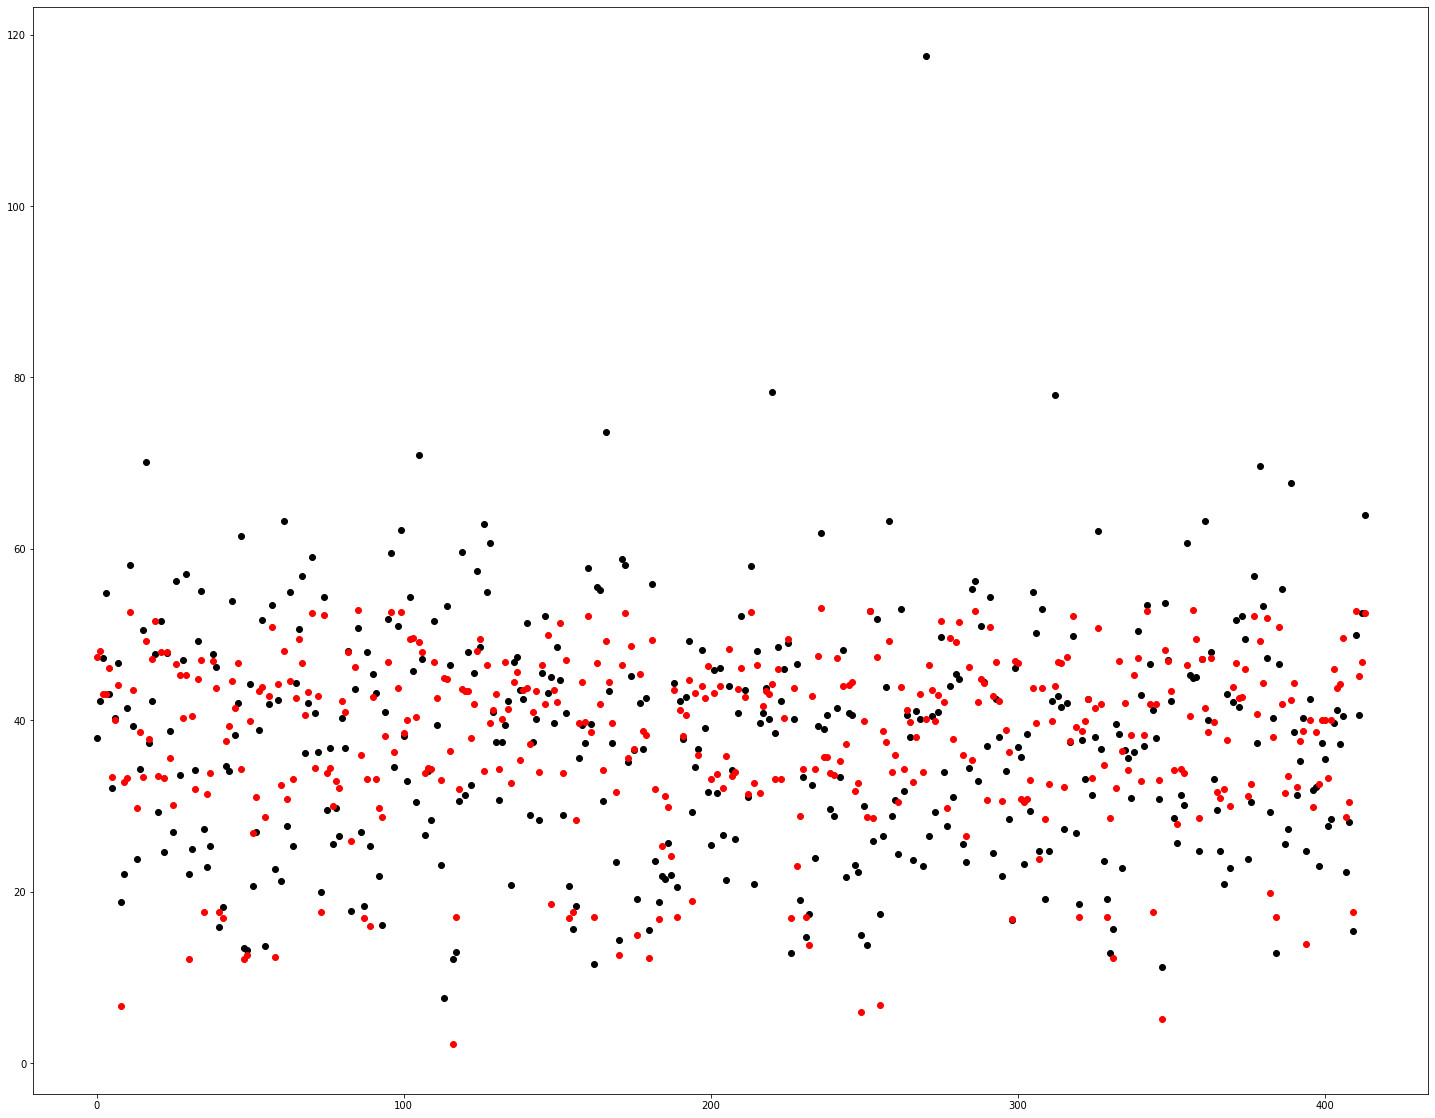

In [76]:
plt.figure(figsize=(25, 20))
plt.scatter(x=list(range(0, X.shape[0])),y= y, color='black')         
plt.scatter(x=list(range(0, X.shape[0])), y=y_hat, color='red')
plt.show()

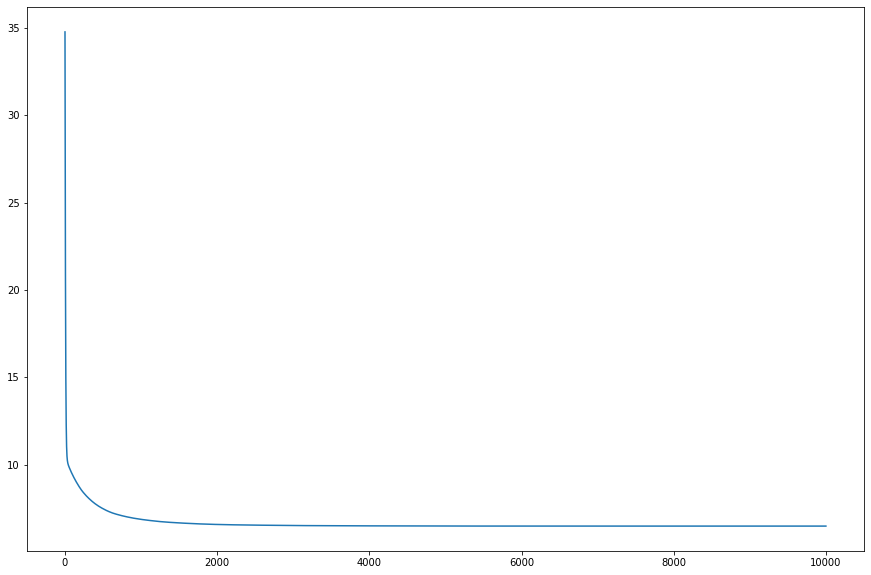

In [77]:
plt.figure(figsize=(15, 10))
plt.plot(list(range(0, 10000)), J)     
